## All Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
job_events_df = pd.read_json('/mnt/md0/Projects/vdjserver/vdjserverJobEvents.json')
job_permissions_df = pd.read_json('/mnt/md0/Projects/vdjserver/vdjserverJobPermissions.json')
jobs_all_df = pd.read_json('/mnt/md0/Projects/vdjserver/vdjserverJobs_all.json')
jobs_all_df['parameters.Creator'] = jobs_all_df['parameters'].apply(lambda x: json.loads(x).get('Creator', np.nan) if x else np.nan)
metadata_perms_df = pd.read_json('/mnt/md0/Projects/vdjserver/vdjserverMetadataPermissions.json')

with open('/mnt/md0/Projects/vdjserver/vdjserverJsonArrayFeb042025.json', 'r') as f:
    jsonarray = json.load(f)

In [3]:
metadata_perms_df

,id,last_updated,permission,username,uuid,tenant_id
0,5,2014-01-21 17:00:11,READ_WRITE,test3,0001389977207738-5056a550b8-0001-012,vdjserver.org
1,6,2014-01-21 17:00:41,READ_WRITE,test4,0001389977207738-5056a550b8-0001-012,vdjserver.org
2,9,2014-01-21 17:21:43,READ_WRITE,test11,0001389977207738-5056a550b8-0001-012,vdjserver.org
3,14,2014-01-29 10:28:16,READ_WRITE,jfonner,0001389977207738-5056a550b8-0001-012,vdjserver.org
4,17,2014-01-29 14:06:38,READ_WRITE,adshkl;dasfhkdf,0001391025968832-5056a550b8-0001-012,vdjserver.org
...,...,...,...,...,...,...
760590,1444986,2025-01-25 09:44:43,READ_WRITE,schristley,3580715269144908271-242ac118-0001-012,vdjserver.org
760591,1444987,2025-01-25 09:44:44,READ_WRITE,schristley,3569118857445708271-242ac118-0001-012,vdjserver.org
760592,1444988,2025-01-25 09:44:44,READ_WRITE,schristley,3557565395419468271-242ac118-0001-012,vdjserver.org
760593,1444989,2025-01-25 09:44:44,READ_WRITE,schristley,3547300423582028271-242ac118-0001-012,vdjserver.org


In [4]:
def json_print(item):
    print(json.dumps(item, indent = 4))

## VDJServer_mailing_list.txt 

In [4]:
mailing_list = pd.read_csv("/mnt/md0/Projects/vdjserver/VDJServer_mailing_list.txt", sep = ';', skiprows = 8)
mailing_list.columns = ['Email']
mailing_list = mailing_list.iloc[:-5]
mailing_list['updated_email'] = mailing_list['Email'].apply(lambda row: row.replace(" at ", "@"))

# mailing_list['updated_email'].to_csv('email_list.txt', index = False)
print(mailing_list)

                                Email                  updated_email
0              12ysliu2 at stu.edu.cn            12ysliu2@stu.edu.cn
1               18982180702 at msn.cn             18982180702@msn.cn
2    2008110020 at alumni.sjtu.edu.cn  2008110020@alumni.sjtu.edu.cn
3                2383920158 at qq.com              2383920158@qq.com
4              2deepayan at gmail.com            2deepayan@gmail.com
..                                ...                            ...
571               zhanxw at gmail.com               zhanxw@gmail.com
572             zhe.sang at gmail.com             zhe.sang@gmail.com
573             zicheng at utexas.edu             zicheng@utexas.edu
574              zluo819 at gmail.com              zluo819@gmail.com
575            zyf950619 at gmail.com            zyf950619@gmail.com

[576 rows x 2 columns]


## Check What Kind Of Metadata We Have

In [5]:
item_types = set()
for item in jsonarray:
    item_type = item['name']
    item_types.add(item_type)
print(sorted(item_types))
print(len(item_types))

['adc_cache', 'adc_cache_repertoire', 'adc_cache_study', 'adc_system_repositories', 'archive_project', 'async_query', 'bioProcessing', 'bioProcessingColumns', 'cellProcessing', 'cellProcessingColumns', 'communityDataSRA', 'data_processing', 'deletedProject', 'diagnosis', 'diagnosisColumns', 'feedback', 'garbage', 'irplus_analysis', 'job', 'nucleicAcidProcessing', 'nucleicAcidProcessingColumns', 'passwordReset', 'private_project', 'processMetadata', 'profile', 'project', 'projectFile', 'projectJob', 'projectJobArchive', 'projectJobFile', 'projectLoad', 'projectPublishInProcess', 'projectUnpublishInProcess', 'publicProject', 'public_project', 'rearrangementLoad', 'repertoire', 'sample', 'sampleColumns', 'sampleGroup', 'sample_processing', 'statistics_cache', 'statistics_cache_repertoire', 'statistics_cache_study', 'subject', 'subjectColumns', 'test', 'testMetadata', 'testmetadata', 'testmetadatamp', 'userVerification', 'vdjpipeWorkflow']
52


In [283]:
for item in jsonarray:
    item_type = item['name']
    if item_type == 'profile':
        print(json.dumps(item, indent = 4))
        break
        

{
    "_id": {
        "$oid": "52d95bcbe4b0f097f3cf5d6d"
    },
    "uuid": "0001389976523746-5056a550b8-0001-012",
    "owner": "wscarbor",
    "tenantId": "vdjserver.org",
    "schemaId": null,
    "internalUsername": null,
    "associationIds": [],
    "lastUpdated": "2016-04-27T15:07:26.261-05:00",
    "name": "profile",
    "value": {
        "firstName": "Walter",
        "lastName": "Scarborough",
        "email": "wscarbor@tacc.utexas.edu",
        "city": "Austin",
        "state": "TX",
        "country": "USA",
        "affiliation": ""
    },
    "created": "2014-01-17T10:35:23.649-06:00"
}


## Look At User Email Informations
- Contains email
- Firstname, Lastname
- City, State, Country

In [284]:
profile_list = []
for item in jsonarray:
    item_type = item['name']
    if item_type == 'profile':
        uuid = item.get('uuid', None)
        owner = item.get('owner', None)
        first_name = item.get('value', {}).get('firstName', None)
        last_name = item.get('value', {}).get('lastName', None)
        email = item.get('value', {}).get('email', None)
        city = item.get('value', {}).get('city', None)
        state = item.get('value', {}).get('state', None)
        country = item.get('value', {}).get('country', None)
        created = item.get('created', None)
        last_updated = item.get('lastUpdated', None)
            # Append the extracted data as a dictionary to the list
        profile_list.append({
            'uuid': uuid,
            'owner': owner,
            'firstName': first_name,
            'lastName': last_name,
            'email': email,
            'city': city,
            'state': state,
            'country': country,
            'created': created,
            'lastUpdated': last_updated
        })
# Create a DataFrame from the list of extracted data
df_profile = pd.DataFrame(profile_list)
# Print the DataFrame
df_profile.tail()

,uuid,owner,firstName,lastName,email,city,state,country,created,lastUpdated
1817,6242932598575984145-242ac118-0001-012,rgarcia,Rodrigo,García Valiente,r.garciavaliente@amsterdamumc.nl,Amsterdam,,Netherlands,2025-01-02T11:11:52.894-06:00,2025-01-02T11:11:52.894-06:00
1818,2755888095932968465-242ac118-0001-012,rgarciav,Rodrigo,García Valiente,r.garciavaliente@amsterdamumc.nl,,,,2025-01-02T11:41:52.070-06:00,2025-01-02T11:41:52.070-06:00
1819,5481029658171207185-242ac118-0001-012,erichardson,Eve,Richardson,erichardson@lji.org,San Diego,California,United States,2025-01-07T18:01:25.657-06:00,2025-01-07T18:01:25.657-06:00
1820,4458895817601248785-242ac118-0001-012,samwol,,,samuel.wollenburg@utsouthwestern.edu,,,,2025-01-07T20:24:59.390-06:00,2025-01-07T20:24:59.390-06:00
1821,9076859566261923345-242ac118-0001-012,chrisjames1992,Chinweike Christopher,Udoye,chinweikechristopher.udoye@uksh.de,Lübeck,Schleswig-Holstein,Germany,2025-01-17T07:54:02.133-06:00,2025-01-17T07:54:02.133-06:00


## Look at UserVerification Data
- Contains Username
- Contains if the user is verified or not

In [8]:
userVerification_list = []
for item in jsonarray:
    item_type = item['name']
    if item_type == 'userVerification':
        uuid = item.get('uuid', None)  # Use .get() to avoid KeyError if 'uuid' is missing
        username = item.get('value', {}).get('username', None)  # Check if 'username' exists in 'value'
        is_verified = item.get('value', {}).get('isVerified', None)  # Check if 'isVerified' exists in 'value'
        last_updated = item.get('lastUpdated', None)
        # Append the extracted data as a dictionary to the list
        userVerification_list.append({
            'uuid': uuid,
            'username': username,
            'isVerified': is_verified,
            'last_updated': last_updated
        })
# Create a DataFrame from the list of extracted data
df_userVerification = pd.DataFrame(userVerification_list)
# Print the DataFrame
print(f"Total Number of User: {df_userVerification.shape}")
df_userVerification.tail()

Total Number of User: (1881, 4)


,uuid,username,isVerified,last_updated
1876,6215315958862704145-242ac118-0001-012,rgarcia,False,2025-01-02T11:11:53.537-06:00
1877,2740039666610728465-242ac118-0001-012,rgarciav,False,2025-01-02T11:41:52.439-06:00
1878,5464751732119367185-242ac118-0001-012,erichardson,True,2025-01-07T18:01:47.373-06:00
1879,4443820482392288785-242ac118-0001-012,samwol,True,2025-01-23T11:35:37.964-06:00
1880,9055857176184483345-242ac118-0001-012,chrisjames1992,False,2025-01-17T07:54:02.622-06:00


## Look at ProjectFile data
  - Contains only ProjectUUID
  - Contains file upload information for the project
  - Contains P

In [9]:
projectFiles_list = []
for item in jsonarray:
    item_type = item['name']
    if item_type == 'projectFile':
        uuid = item.get('uuid', None)
        associationIds = item.get('associationIds', None)
        projectUuid = item.get('value', {}).get('projectUuid', None)
        owner = item.get('owner', None)
        task_type= item.get('value', {}).get('type', None)
        file_name = item.get('value', {}).get('name', None)
        mimeType = item.get('value', {}).get('mimeType', None)
        last_updated = item.get('lastUpdated', None)
        if associationIds:
            associationIds_1 = associationIds[0]
            if len(associationIds)>1:
                associationIds_2 = associationIds[1]
                if len(associationIds) > 2:
                    print("Length associationIds: ", len(associationIds))
            else:
                associationIds_2 = None
        else:
            associationIds_1 = None
            associationIds_2 = None
        # Append the extracted data as a dictionary to the list
        projectFiles_list.append({
            'uuid': uuid,
            'projectUuid': projectUuid,
            'associationIds_1': associationIds_1,
            'associationIds_2': associationIds_2,
            'owner': owner,
            'task_type': task_type,
            'file_name': file_name,
            'mimeType': mimeType,
            'last_updated': last_updated
        })

# Create a DataFrame from the list of extracted data
df_projectFiles = pd.DataFrame(projectFiles_list)
# Print the DataFrame
df_projectFiles.tail()

,uuid,projectUuid,associationIds_1,associationIds_2,owner,task_type,file_name,mimeType,last_updated
35943,5338423137409494545-242ac118-0001-012,5456400192359305711-242ac118-0001-012,6793987554023894545-242ac112-0001-002,5456400192359305711-242ac118-0001-012,vdj,None,4468_S24_L001_R1_001.fastq.gz,None,2025-01-13T16:40:40.230-06:00
35944,1335427718191574545-242ac118-0001-012,5456400192359305711-242ac118-0001-012,2833383462017494545-242ac112-0001-002,5456400192359305711-242ac118-0001-012,vdj,None,4468_S24_L001_R2_001.fastq.gz,None,2025-01-13T16:40:40.230-06:00
35945,1840700597200490991-242ac118-0001-012,5456400192359305711-242ac118-0001-012,366925519251050991-242ac112-0001-002,5456400192359305711-242ac118-0001-012,vdj,None,6634_S25_L001_R1_001.fastq.gz,None,2025-01-13T16:40:43.277-06:00
35946,5023614960920170991-242ac118-0001-012,5456400192359305711-242ac118-0001-012,3549539235260010991-242ac112-0001-002,5456400192359305711-242ac118-0001-012,vdj,None,6634_S25_L001_R2_001.fastq.gz,None,2025-01-13T16:40:43.281-06:00
35947,7830832104257678865-242ac118-0001-012,5456400192359305711-242ac118-0001-012,8017190735231118865-242ac112-0001-002,5456400192359305711-242ac118-0001-012,vdj,None,primers.fasta,None,2025-01-13T16:41:49.035-06:00


In [10]:
#Keeping only projectfiles if the are owned by vdj and schristley
# df_projectFiles = df_projectFiles[df_projectFiles.owner.isin(['vdj', 'schristley'])]
df_projectFiles.owner.value_counts()


owner
vdj                31713
schristley          1250
wscarbor             891
wrounds              517
esalina              416
                   ...  
mrojas                 1
rytis                  1
randocalrissian        1
hrhinn                 1
xmr5148                1
Name: count, Length: 102, dtype: int64

In [11]:
df_projectFiles[df_projectFiles.file_name == '18M.fasta']

,uuid,projectUuid,associationIds_1,associationIds_2,owner,task_type,file_name,mimeType,last_updated
18796,2428928387311529495-242ac119-0001-012,7058216970366620136-242ac11e-0001-012,4248491282261929495-242ac112-0001-002,7058216970366620136-242ac11e-0001-012,vdj,None,18M.fasta,None,2019-02-15T16:20:15.208-06:00
21542,646759332934512150-242ac116-0001-012,3276777473314001386-242ac116-0001-012,2075952650351472150-242ac113-0001-002,3276777473314001386-242ac116-0001-012,vdj,None,18M.fasta,None,2020-01-17T10:25:24.813-06:00


## Look at projectJob data
  - Contains ProjectUUID and JobUUID

In [162]:
projectJob_list = []
for item in jsonarray:
    item_type = item['name']
    if item_type == 'projectJob':
        # json_print(item)
        uuid = item.get('uuid', None)
        owner = item.get('owner', None)
        projectUuid = item.get('value', {}).get('projectUuid', None)
        jobUuid = item.get('value', {}).get('jobUuid', None)
        last_updated = item.get('lastUpdated', None)
        projectJob_list.append({
            'uuid': uuid,
            'owner': owner,
            'projectUuid': projectUuid,
            'jobUuid': jobUuid,
            'lastUpdated': last_updated
        })

# Create a DataFrame from the list of extracted data
df_projectJob = pd.DataFrame(projectJob_list)
df_projectJob.head()

,uuid,owner,projectUuid,jobUuid,lastUpdated
0,0001400192074855-5056a550b8-0001-012,vdj,0001399309581559-5056a550b8-0001-012,0001399315558601-5056a550b8-0001-007,2014-05-15T17:14:34.855-05:00
1,0001400254373114-5056a550b8-0001-012,vdj,0001400250478554-5056a550b8-0001-012,0001400254372814-5056a550b8-0001-007,2014-05-16T10:32:53.114-05:00
2,0001400273862423-5056a550b8-0001-012,vdj,0001400250478554-5056a550b8-0001-012,0001400273862119-5056a550b8-0001-007,2014-05-16T15:57:42.423-05:00
3,0001400274448495-5056a550b8-0001-012,vdj,0001400250478554-5056a550b8-0001-012,0001400274448320-5056a550b8-0001-007,2014-05-16T16:07:28.494-05:00
4,0001400274714655-5056a550b8-0001-012,vdj,0001400250478554-5056a550b8-0001-012,0001400274714490-5056a550b8-0001-007,2014-05-16T16:11:54.655-05:00


In [13]:
df_projectJob[df_projectJob.projectUuid == '7058216970366620136-242ac11e-0001-012']

,uuid,owner,projectUuid,jobUuid,lastUpdated
3524,360484783884014056-242ac11e-0001-012,vdj,7058216970366620136-242ac11e-0001-012,217677121292014056-242ac11b-0001-007,2018-04-17T10:50:14.832-05:00
3525,5644951932076289560-242ac11e-0001-012,vdj,7058216970366620136-242ac11e-0001-012,5814903787979009560-242ac11b-0001-007,2018-04-17T13:54:01.922-05:00
3622,4704510086896283160-242ac11e-0001-012,vdj,7058216970366620136-242ac11e-0001-012,4916552622299803160-242ac11b-0001-007,2018-05-30T16:16:40.464-05:00
3840,8974371275809231336-242ac11e-0001-012,vdj,7058216970366620136-242ac11e-0001-012,8802787332334031336-242ac11b-0001-007,2018-07-16T11:22:51.666-05:00
3841,185958136163013096-242ac11e-0001-012,vdj,7058216970366620136-242ac11e-0001-012,0029001919173096-242ac11b-0001-007,2018-07-16T11:40:55.535-05:00
4225,753010572288070121-242ac119-0001-012,vdj,7058216970366620136-242ac11e-0001-012,592378795417670121-242ac11c-0001-007,2019-02-27T16:40:20.145-06:00
4226,8331554514421092841-242ac119-0001-012,vdj,7058216970366620136-242ac11e-0001-012,8144122141623652841-242ac11c-0001-007,2019-02-27T16:31:40.346-06:00


In [14]:
job_uuid = '8802787332334031336-242ac11b-0001-007'
jobs_all_df[jobs_all_df.uuid == job_uuid].iloc[0].archive_path

'/projects/7058216970366620136-242ac11e-0001-012/analyses/2018-07-16-16-21-59-86-my-job-16-jul-2018-11:21:45-am'

## Look at ProjectJObFILE 
- Contains both Project UUID and JOBUUID
- file-type
- filename
- if it is deleted 

In [15]:
projectJobFile_list = []
for item in jsonarray:
    item_type = item['name']
    if item_type == 'projectJobFile':
        owner = item.get('owner', None)
        projectUuid = item.get('value', {}).get('projectUuid', None)
        jobUuid = item.get('value', {}).get('jobUuid', None)
        fileType = item.get('value', {}).get('fileType', None)
        file_name = item.get('value', {}).get('name', None)
        length = item.get('value', {}).get('length', None)
        isDeleted = item.get('value', {}).get('isDeleted', None)
        last_updated = item.get('lastUpdated', None)
        projectJobFile_list.append({
            'owner': owner,
            'projectUuid': projectUuid,
            'jobUuid': jobUuid,
            'fileType': fileType,
            'file_name': file_name,
            'file_length': length,
            'isDeleted': isDeleted,
            'lastUpdated': last_updated
        })

# Create a DataFrame from the list of extracted data
df_projectJobFile = pd.DataFrame(projectJobFile_list)
df_projectJobFile.tail()

# df_projectJobFile.projectUuid.value_counts()
# df_projectJobFile.jobUuid.value_counts()
# df_projectJob.projectUuid.value_counts()
# df_projectJob[df_projectJob.projectUuid.isin(df_projectJobFile.projectUuid)].projectUuid.value_counts()
# df_projectJobFile.isDeleted.value_counts()

,owner,projectUuid,jobUuid,fileType,file_name,file_length,isDeleted,lastUpdated
474031,vdj,5456400192359305711-242ac118-0001-012,c7cd08ad-a560-4574-a363-b9cc4c5e051d-007,6,UTSW33_S42_L001_R1_001.fastq.merged.unique.igb...,194102,False,2025-01-25T09:44:27.029-06:00
474032,vdj,5456400192359305711-242ac118-0001-012,c7cd08ad-a560-4574-a363-b9cc4c5e051d-007,6,UTSW33_S42_L001_R1_001.fastq.merged.unique.igb...,4178241,False,2025-01-25T09:44:27.318-06:00
474033,vdj,5456400192359305711-242ac118-0001-012,c7cd08ad-a560-4574-a363-b9cc4c5e051d-007,6,UTSW33_S42_L001_R1_001.fastq.merged.unique.igb...,10699728,False,2025-01-25T09:44:27.561-06:00
474034,vdj,5456400192359305711-242ac118-0001-012,c7cd08ad-a560-4574-a363-b9cc4c5e051d-007,6,UTSW33_S42_L001_R1_001.fastq.merged.unique.igb...,1068987,False,2025-01-25T09:44:27.827-06:00
474035,vdj,5456400192359305711-242ac118-0001-012,c7cd08ad-a560-4574-a363-b9cc4c5e051d-007,0,vdjserver_germline.airr.json,3456292,False,2025-01-25T09:44:28.085-06:00


In [16]:
#Keeping only projectfiles if the are owned by vdj and schristley
df_projectJobFile = df_projectJobFile[df_projectJobFile.owner.isin(['vdj', 'schristley'])]
df_projectJobFile.owner.value_counts()

owner
vdj           473549
schristley        18
Name: count, dtype: int64

## Look at Subject Metadata

In [183]:
subject_list = []
for item in jsonarray:
    item_type = item['name']
    if item_type == 'subject':
        # json_print(item)
        uuid = item.get('uuid', None)
        owner = item.get('owner', None)
        associationIds = item.get('associationIds', None)
        last_updated = item.get('lastUpdated', None)
        if associationIds:
            associationIds_1 = associationIds[0]   
        else:
            associationIds_1 = None
        subject_list.append({
            'uuid': uuid,
            'owner': owner,
            'projectUuid': associationIds_1,
            'lastUpdated': last_updated
        })

# Create a DataFrame from the list of extracted data
df_subjects = pd.DataFrame(subject_list)
df_subjects

,uuid,owner,projectUuid,lastUpdated
0,6360709198094930406-242ac11c-0001-012,vdj,8241732730493932006-242ac11f-0001-012,2016-11-22T13:31:42.578-06:00
1,6360709202389897702-242ac11c-0001-012,vdj,8241732730493932006-242ac11f-0001-012,2016-11-22T13:31:41.522-06:00
2,6360923946459730406-242ac11c-0001-012,vdj,8241732730493932006-242ac11f-0001-012,2016-11-22T13:31:40.441-06:00
3,6361482292208210406-242ac11c-0001-012,vdj,8241732730493932006-242ac11f-0001-012,2017-01-03T13:48:30.111-06:00
4,1158355700316040730-242ac11c-0001-012,demo2016,859535379303755290-242ac114-0001-012,2018-05-03T10:24:22.094-05:00
...,...,...,...,...
5419,3547623744646082065-242ac118-0001-012,vdj-test1,5139818080333393425-242ac118-0001-012,2024-05-21T13:41:59.791-05:00
5420,4406571231448928751-242ac118-0001-012,loubna_boutkhil,2377764881775717905-242ac118-0001-012,2024-06-01T04:20:51.010-05:00
5421,4487101868248928751-242ac118-0001-012,loubna_boutkhil,2377764881775717905-242ac118-0001-012,2024-06-01T04:20:52.885-05:00
5422,4554747603160928751-242ac118-0001-012,loubna_boutkhil,2377764881775717905-242ac118-0001-012,2024-06-01T04:20:54.461-05:00


In [187]:
df_subjects['projectUuid'].nunique()

382

In [189]:
df_subjects[['owner', 'projectUuid']].value_counts()

owner      projectUuid                          
vdj        1346418785674727916-242ac117-0001-012    1165
           7405514755678596630-242ac113-0001-012     786
           4465604624794643990-242ac116-0001-012     350
           8006422057040941546-242ac116-0001-012     299
           1443107289580563990-242ac116-0001-012     170
                                                    ... 
vdj-test1  7808900147506376210-242ac117-0001-012       1
           7844248211544805871-242ac118-0001-012       1
za708      3747020520399891990-242ac116-0001-012       1
           3868686842054635030-242ac116-0001-012       1
           8428968221950939626-242ac116-0001-012       1
Name: count, Length: 387, dtype: int64

In [ ]:
meta

## Look at Private Project data

In [17]:
private_project_list = []
for item in jsonarray:
    item_type = item['name']
    if item_type == 'private_project':
        json_print(item)
        break
        uuid = item.get('uuid', None)
        study_title = item.get('value', {}).get('study_title', None)
        job_owner = item.get('value', {}).get('owner', None)
        last_updated = item.get('lastUpdated', None)
        private_project_list.append({
            'uuid': uuid,
            'job_owner': job_owner,
            'study_title': study_title,
            'lastUpdated': last_updated
        })

# Create a DataFrame from the list of extracted data
df_private_project = pd.DataFrame(private_project_list)
df_private_project

{
    "_id": {
        "$oid": "5e976b3352faff00010d8956"
    },
    "uuid": "4727197546809323030-242ac116-0001-012",
    "schemaId": null,
    "internalUsername": null,
    "associationIds": [],
    "lastUpdated": "2022-12-18T01:14:56.568-06:00",
    "name": "private_project",
    "value": {
        "study_id": null,
        "study_title": "My project",
        "study_type": null,
        "study_description": "A test project",
        "inclusion_exclusion_criteria": null,
        "grants": null,
        "collected_by": null,
        "lab_name": "My lab",
        "lab_address": "UT Southwestern Medical Center",
        "submitted_by": null,
        "pub_ids": null,
        "keywords_study": null,
        "owner": "schristley"
    },
    "created": "2020-04-15T15:14:43.150-05:00",
    "owner": "vdj",
    "tenantId": "vdjserver.org"
}


""


In [18]:
# df_private_project.to_csv('private_projects.csv', index = False)

## Look at Public Project Data

In [160]:
public_project_list = []
for item in jsonarray:
    item_type = item['name']
    if item_type == 'public_project':
        # json_print(item)
        # break
        uuid = item.get('uuid', None)
        study_id = item.get('value', {}).get('study_id', None)
        study_title = item.get('value', {}).get('study_title', None)
        associationIds = item.get('associationIds', None)
        last_updated = item.get('lastUpdated', None)
        public_project_list.append({
            'uuid': uuid,
            'study_id': study_id,
            'associationIds': associationIds,
            'study_title': study_title,
            'lastUpdated': last_updated
        })

# Create a DataFrame from the list of extracted data
df_public_project = pd.DataFrame(public_project_list)
df_public_project.head()

,uuid,study_id,associationIds,study_title,lastUpdated
0,4505707319090933270-242ac113-0001-012,4505707319090933270-242ac113-0001-012,[],Outcome and Immune Correlates of a Phase II Tr...,2022-12-18T01:14:48.159-06:00
1,2034535426280329706-242ac113-0001-012,PRJNA300878,[],Individual heritable differences result in uni...,2022-12-18T01:14:48.306-06:00
2,5350423756993719830-242ac113-0001-012,1371444213709729305-242ac11c-0001-012,[],T cell receptor repertoires after adoptive tra...,2022-12-18T01:14:48.028-06:00
3,1570295022599213546-242ac113-0001-012,3276777473314001386-242ac116-0001-012,[],Biophysicochemical Motifs in T cell Receptor S...,2022-12-18T01:14:47.900-06:00
4,54655627105407466-242ac113-0001-012,PRJNA248475,[],B cells populating the multiple sclerosis brai...,2022-12-18T01:14:48.453-06:00


In [21]:
for item in jsonarray:
    item_type = item['name']
    if '1002552565004824085-242ac117-0001-012' == item.get('uuid', None):
        print(item)

{'_id': {'$oid': '6119d12ad6018000016d697a'}, 'uuid': '1002552565004824085-242ac117-0001-012', 'schemaId': None, 'internalUsername': None, 'associationIds': [], 'lastUpdated': '2022-12-18T01:14:49.952-06:00', 'name': 'public_project', 'value': {'study_id': 'PRJNA624801', 'study_title': 'A Potently Neutralizing Antibody Protects Mice against SARS-CoV-2 Infection', 'study_type': {'id': 'NCIT:C93130', 'label': 'Animal Study'}, 'study_description': 'Severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2) is responsible for millions of infections and hundreds of thousands of deaths globally. There are no widely available licensed therapeutics against SARS-CoV-2, highlighting an urgent need for effective interventions. The virus enters host cells through binding of a receptor-binding domain within its trimeric spike glycoprotein to human angiotensin-converting enzyme 2. In this article, we describe the generation and characterization of a panel of murine mAbs directed against the recept

In [22]:
# col_list = ['uuid', 'owner', 'associationIds', 'created', 'lastUpdated', 'name', 'value']
# obj_list = {}
# project_uuid = '1874419312501190165-242ac117-0001-012'
# data_dir = 'Metadata_public_project/'  

# # Open a file in write mode
# with open(f'{data_dir}{project_uuid}_metadata.json', 'w') as file:
#     for item in jsonarray:
#         item_type = item['name']
#         # json_print(item)
#         if project_uuid in item.get('uuid', None) and item_type == 'public_project':
#             obj = {}
#             for col_name in col_list:
#                 obj[col_name] = item.get(col_name, None)
#             # print(obj)
#             json.dump(obj, file)
#             file.write('\n')  # Add a newline after each JSON object
            
#         if project_uuid in item.get('associationIds', None):
#             # json_print(item)
#             obj = {}
#             for col_name in col_list:
#                 obj[col_name] = item.get(col_name, None)
#             # print(obj)
#             json.dump(obj, file)
#             file.write('\n')  # Add a newline after each JSON object
        
        
    
    

## Look for ProjectFiles using ProjectUUID

In [23]:
df_projectFiles.head()

,uuid,projectUuid,associationIds_1,associationIds_2,owner,task_type,file_name,mimeType,last_updated
0,0001395955349445-5056a550b8-0001-012,,None,None,vdjauth,,None,None,2014-03-27T16:22:29.444-05:00
1,0001396029083309-5056a550b8-0001-012,0001395346788177-5056a550b8-0001-012,0001395939852441-5056a550b8-0001-002,None,vdjauth,uploaded,gitprep-latest.zip,application/zip,2014-03-28T12:51:23.309-05:00
2,0001396029805022-5056a550b8-0001-012,0001395346788177-5056a550b8-0001-012,0001395956517022-5056a550b8-0001-002,None,vdjauth,uploaded,Induction-28.zip,application/zip,2014-03-28T13:03:25.022-05:00
3,0001396030144907-5056a550b8-0001-012,0001395346788177-5056a550b8-0001-012,0001396030144691-5056a550b8-0001-002,None,vdjauth,uploaded,test10.txt,text/plain,2014-03-28T13:09:04.907-05:00
4,0001396039988083-5056a550b8-0001-012,0001395346788177-5056a550b8-0001-012,0001396039987794-5056a550b8-0001-002,None,vdjauth,uploaded,test11.txt,text/plain,2014-03-28T15:53:08.083-05:00


In [24]:
data_df_list = []
for project_uuid in df_public_project.uuid:
    data = df_projectFiles[df_projectFiles.associationIds_2 == project_uuid]
    if not data.empty:
        data_df_list.append(data)
        print(project_uuid)
        # # print(data)
        # break
print(len(data_df_list))
# data_df_list

1002552565004824085-242ac117-0001-012
1874419312501190165-242ac117-0001-012
7800490195324703211-242ac117-0001-012
8808030969725784556-242ac117-0001-012
9007962728031055380-242ac117-0001-012
5558760323211783700-242ac117-0001-012
5193259980618657300-242ac117-0001-012
4764775561909899756-242ac118-0001-012
8


## Find total number of Verified user

In [25]:
# Replace None (or NaN) with an empty string in the 'username' column
df_userVerification['username'] = df_userVerification['username'].fillna('not_available')
filtered_df_userVerification = df_userVerification[(~df_userVerification['username'].str.contains('test', case=False)) & (df_userVerification['isVerified'] == True)]
verified_usernames = filtered_df_userVerification.username.tolist()
print(f'Total Number of user is : {df_userVerification.username.count()}')

print(f'Total Number of verified user is : {filtered_df_userVerification.username.count()}')
# print(f'The usernames are: {sorted(verified_usernames)}')

Total Number of user is : 1881
Total Number of verified user is : 1409


## Check if These Verified Users has any Project

In [26]:
verified_users_with_project = metadata_perms_df[metadata_perms_df.username.isin(verified_usernames)]
verified_users_with_project.username.value_counts()
print(f'Total Number of verified user that has project : {verified_users_with_project.username.nunique()}')
print(f'Total Number of unique project : {verified_users_with_project.uuid.nunique()}')

Total Number of verified user that has project : 999
Total Number of unique project : 450579


## Check if These Verified Users has Uploaded any Data

In [27]:
file_upload_with_verified_users = df_projectFiles[df_projectFiles.projectUuid.isin(verified_users_with_project.uuid)]
file_upload_with_verified_users.owner.value_counts()
project_uuid_with_file_uploads = file_upload_with_verified_users.projectUuid.unique().tolist()
print(f'Total Number of projects with file uploads: {file_upload_with_verified_users.projectUuid.nunique()}')
## Check how many users have uploaded any files
verified_user_with_file_upload = verified_users_with_project[verified_users_with_project.uuid.isin(project_uuid_with_file_uploads)]
print(f'Total Number of unique users with file uploads: {verified_user_with_file_upload['username'].nunique()}')

Total Number of projects with file uploads: 1247
Total Number of unique users with file uploads: 572


## Check Users with projectFiles if They Ran any Jobs

In [28]:
job_files_with_verified_users = df_projectJobFile[df_projectJobFile.projectUuid.isin(verified_users_with_project.uuid)]
users_with_project_job_files = verified_users_with_project[verified_users_with_project.uuid.isin(job_files_with_verified_users.projectUuid)]

print(f'Total Number of Projects that Ran Jobs: {job_files_with_verified_users['projectUuid'].nunique()}')
print(f'Total Number of users that Ran Jobs: {users_with_project_job_files['username'].nunique()}')
# job_files_with_verified_users
# users_with_project_job_files

Total Number of Projects that Ran Jobs: 787
Total Number of users that Ran Jobs: 347


## Number of Unique Users Each Year

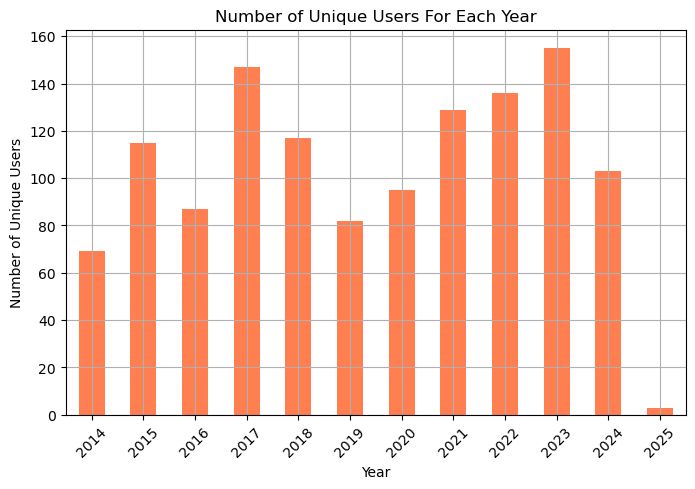

In [29]:
# Convert 'last_updated' to datetime format
df = verified_users_with_project.copy()
df['last_updated'] = pd.to_datetime(df['last_updated'])

 # Extract the year from 'last_updated'
df['year'] = df['last_updated'].dt.year
# Count the number of unique users per year
unique_users_by_year = df.groupby('year')['username'].nunique()

# Plot the number of unique users per year
plt.figure(figsize=(8, 5))
unique_users_by_year.plot(kind='bar', color='coral')
plt.title('Number of Unique Users For Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Unique Users')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Find Top N User That Ran Any JOb

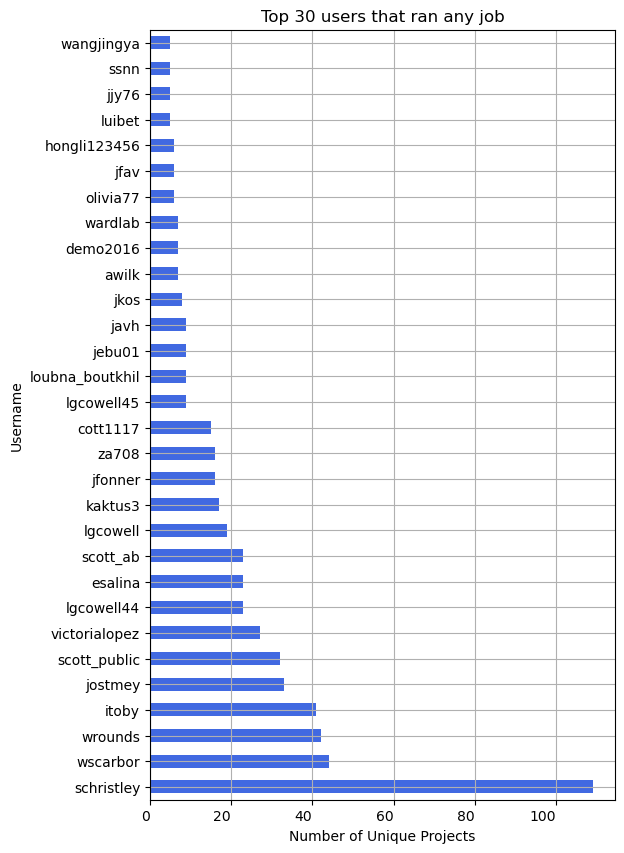

In [30]:

df = users_with_project_job_files.copy()
# number of unique users
n = 30
# Group by 'username' and count the number of unique 'id' (projects) each user has
user_unique_projects = df.groupby('username')['uuid'].nunique()
# Sort users by the number of unique projects (descending order)
top_n_users = user_unique_projects.sort_values(ascending=False).head(n)
# Plot the top 15 users with their unique number of projects
plt.figure(figsize=(6, 10))
top_n_users.plot(kind='barh', color='royalblue')
plt.title(f'Top {n} users that ran any job')
plt.ylabel('Username')
plt.xlabel('Number of Unique Projects')
plt.xticks(rotation=0, ha='right')
plt.grid(True)
plt.show()

## Histogram of Number of Jobs Associated with Each User

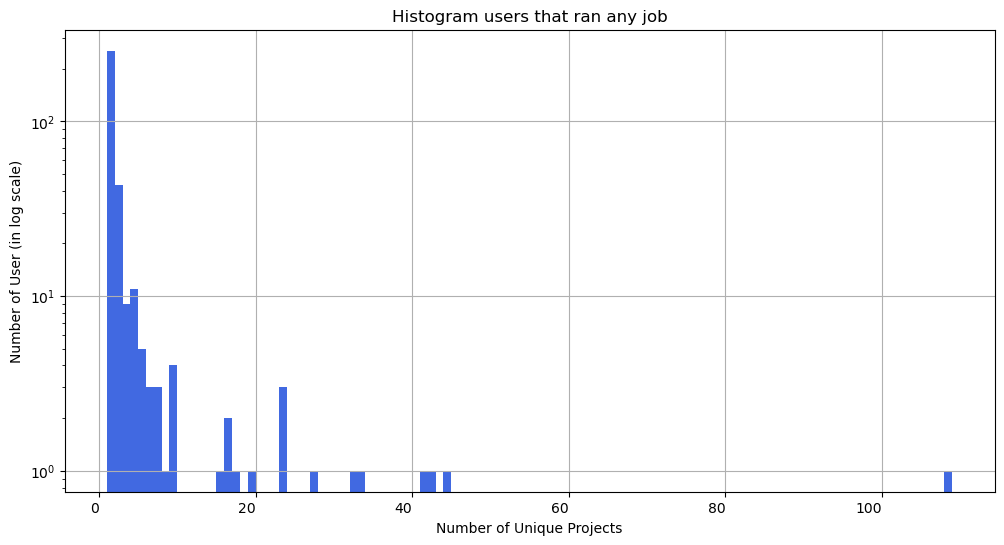

In [31]:

df = users_with_project_job_files.copy()
# number of unique users
n = 30
# Group by 'username' and count the number of unique 'id' (projects) each user has
user_unique_projects = df.groupby('username')['uuid'].nunique()
# Sort users by the number of unique projects (descending order)
top_n_users = user_unique_projects.sort_values(ascending=False)
# Plot the top 15 users with their unique number of projects
plt.figure(figsize=(12, 6))
top_n_users.plot(kind='hist', bins = 'fd', color='royalblue')
plt.title(f'Histogram users that ran any job')
plt.ylabel('Number of User (in log scale)')
plt.xlabel('Number of Unique Projects')
plt.xticks(rotation=0, ha='right')
plt.yscale('log')
plt.grid(True)
plt.show()

## Number of Projects Associated With Each User

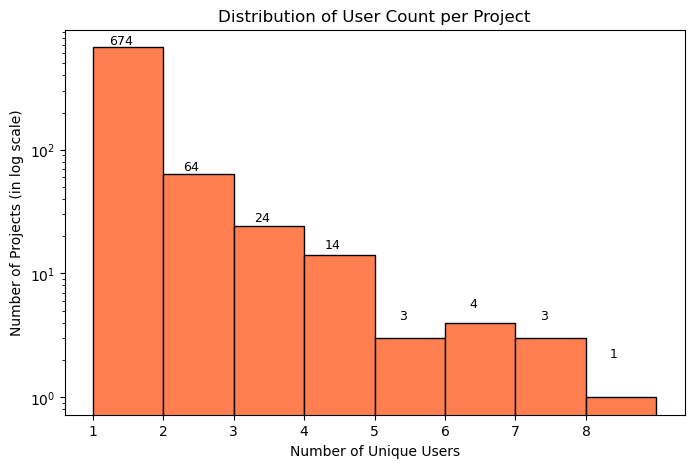

In [32]:
# Count unique users per project (uuid)
users_per_project = users_with_project_job_files.groupby('uuid')['username'].nunique()
# Step 2: Plot histogram
plt.figure(figsize=(8, 5))
bins = range(1, users_per_project.max() + 2)  # +2 to include the last bin
counts, edges, patches = plt.hist(users_per_project, bins=bins, color='coral', edgecolor='black')

# Step 3: Plot formatting
plt.title('Distribution of User Count per Project')
plt.xlabel('Number of Unique Users')
plt.ylabel('Number of Projects (in log scale)')
plt.xticks(range(1, users_per_project.max() + 1))
plt.yscale('log')

# Step 4: Add count labels on top of each bar
for count, edge in zip(counts, edges[:-1]):
    if count > 0:
        plt.text(edge + 0.4, count + 1, str(int(count)), ha='center', va='bottom', fontsize=9)

# Show the plot
plt.show()

## Number of Jobs Run Each Year

Number of unique JobUUID: 5087


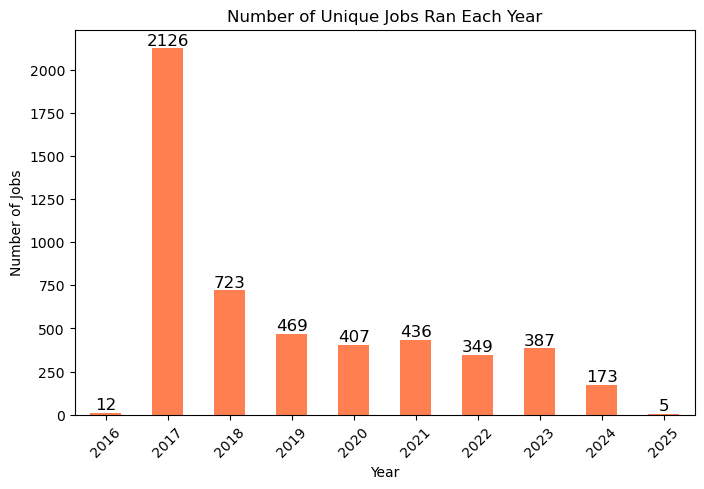

In [33]:

# Convert 'last_updated' to datetime format
df = df_projectJob.copy()
df = df[df.projectUuid.isin(job_files_with_verified_users.projectUuid)]
print(f'Number of unique JobUUID: {df.jobUuid.nunique()}')
## Filter the projectUUID by verified user

df['last_updated'] = pd.to_datetime(df['lastUpdated'], utc = True)
 # Extract the year from 'last_updated'
df['year'] = df['last_updated'].dt.year
# Count the number of unique users per year
unique_jobs_by_year = df.groupby('year')['jobUuid'].nunique()

# Plot the number of unique users per year
plt.figure(figsize=(8, 5))
ax = unique_jobs_by_year.plot(kind='bar', color='coral')
for i, value in enumerate(unique_jobs_by_year.values):
    ax.text(i, value + 0.1, str(value), ha='center', va='bottom', fontsize=12)
plt.title('Number of Unique Jobs Ran Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45)

plt.show()

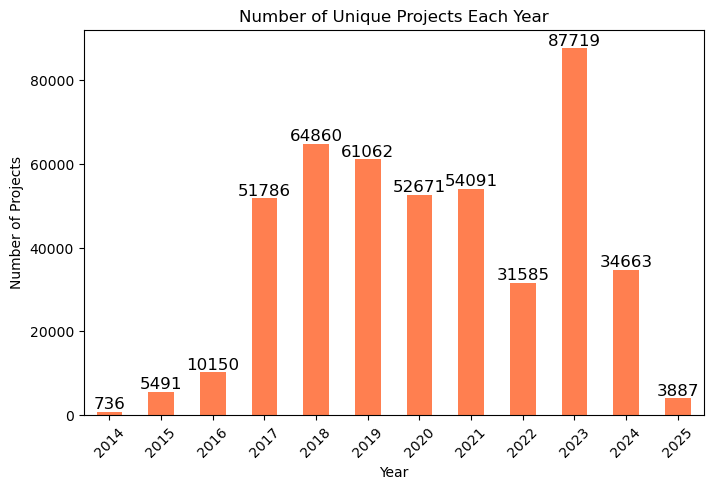

In [34]:
df = verified_users_with_project.copy()
df['last_updated'] = pd.to_datetime(df['last_updated'])
df['year'] = df['last_updated'].dt.year
unique_projectes_created_each_year = df.groupby('year')['uuid'].nunique()
unique_projectes_created_each_year

# Plot the number of unique users per year
plt.figure(figsize=(8, 5))
ax = unique_projectes_created_each_year.plot(kind='bar', color='coral')
for i, value in enumerate(unique_projectes_created_each_year.values):
    ax.text(i, value + 0.1, str(value), ha='center', va='bottom', fontsize=12)
plt.title('Number of Unique Projects Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Projects')
plt.xticks(rotation=45)

plt.show()

## Number of Projects Created Each Year

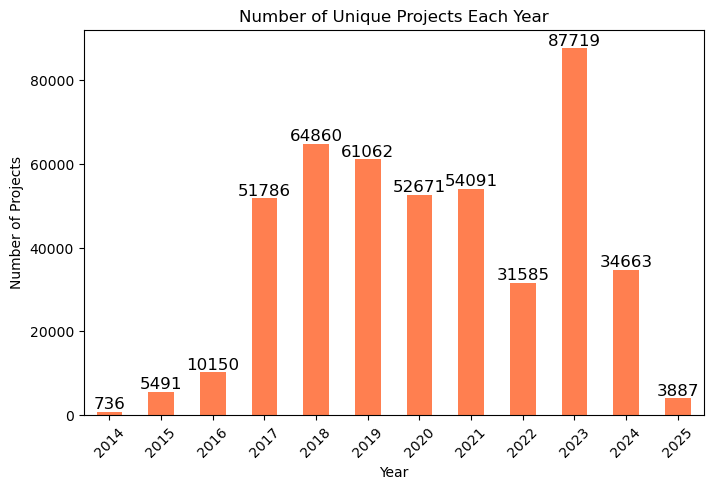

In [35]:
df = verified_users_with_project.copy()
df['last_updated'] = pd.to_datetime(df['last_updated'])
df['year'] = df['last_updated'].dt.year
unique_projectes_created_each_year = df.groupby('year')['uuid'].nunique()
unique_projectes_created_each_year

# Plot the number of unique users per year
plt.figure(figsize=(8, 5))
ax = unique_projectes_created_each_year.plot(kind='bar', color='coral')
for i, value in enumerate(unique_projectes_created_each_year.values):
    ax.text(i, value + 0.1, str(value), ha='center', va='bottom', fontsize=12)
plt.title('Number of Unique Projects Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Projects')
plt.xticks(rotation=45)

plt.show()

## Number of Projects Created Each Year That Ran any Job

Number of unique Projetcs: 784


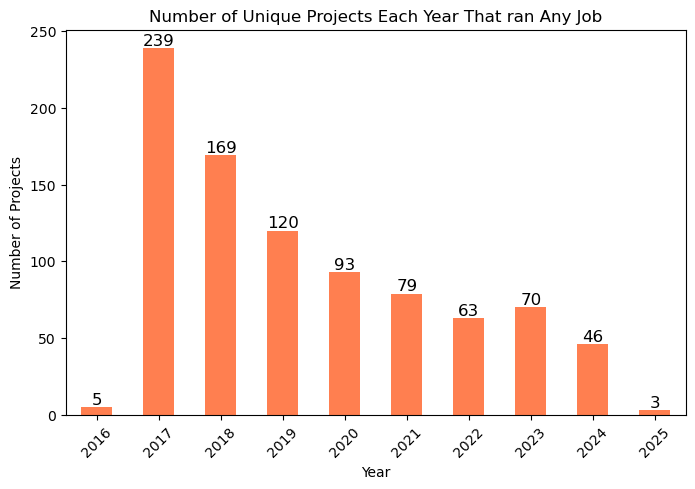

In [36]:
df = df_projectJob.copy()
df = df[df.projectUuid.isin(job_files_with_verified_users.projectUuid)]
print(f'Number of unique Projetcs: {df.projectUuid.nunique()}')
## Filter the projectUUID by verified user

df['last_updated'] = pd.to_datetime(df['lastUpdated'], utc = True)
 # Extract the year from 'last_updated'
df['year'] = df['last_updated'].dt.year
# Count the number of unique users per year
unique_jobs_by_year = df.groupby('year')['projectUuid'].nunique()

# Plot the number of unique users per year
plt.figure(figsize=(8, 5))
ax = unique_jobs_by_year.plot(kind='bar', color='coral')
for i, value in enumerate(unique_jobs_by_year.values):
    ax.text(i, value + 0.1, str(value), ha='center', va='bottom', fontsize=12)
plt.title('Number of Unique Projects Each Year That ran Any Job')
plt.xlabel('Year')
plt.ylabel('Number of Projects')
plt.xticks(rotation=45)

plt.show()

## Number of Files Associated With Each Project

Total number of project: 752
621.0


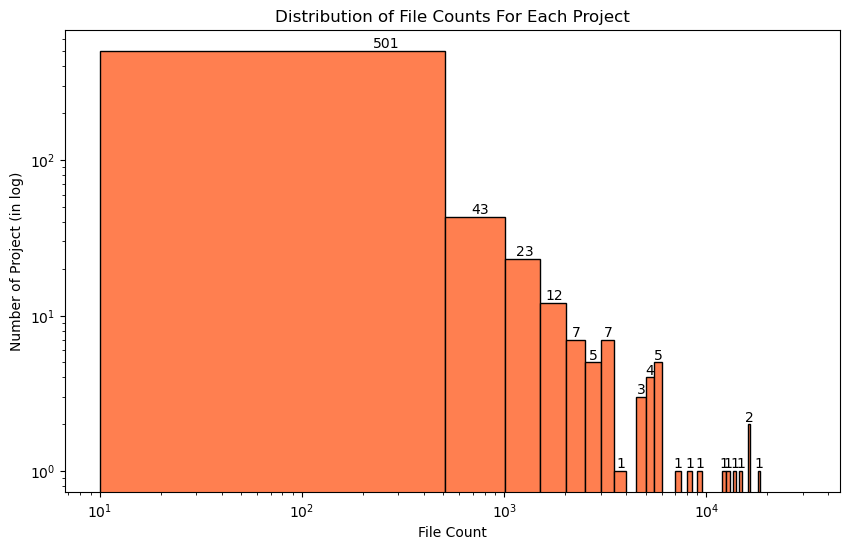

In [37]:

projectUuid_counts = job_files_with_verified_users.projectUuid.value_counts() 
print(f'Total number of project: {sum(projectUuid_counts>2)}')
plt.figure(figsize=(10, 6))
bins = 50
n, bins, patches = plt.hist(projectUuid_counts, bins=range(10, max(projectUuid_counts)+1, 500), color='coral', edgecolor='black')
print(sum(n))
# Add count labels on top of each bar
for i in range(len(patches)):
    height = patches[i].get_height()
    if height > 0:
        plt.text(patches[i].get_x() + patches[i].get_width() / 2, height,  # Offset for clarity
                 f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.title('Distribution of File Counts For Each Project')
plt.xlabel('File Count')
plt.ylabel('Number of Project (in log)')
plt.yscale('log')
plt.xscale('log')

plt.show()


# Plot which country has how many Users

Total number of unique countries: 118


/home/s234499/miniforge3/envs/general_env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/s234499/miniforge3/envs/general_env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22269 (\N{CJK UNIFIED IDEOGRAPH-56FD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


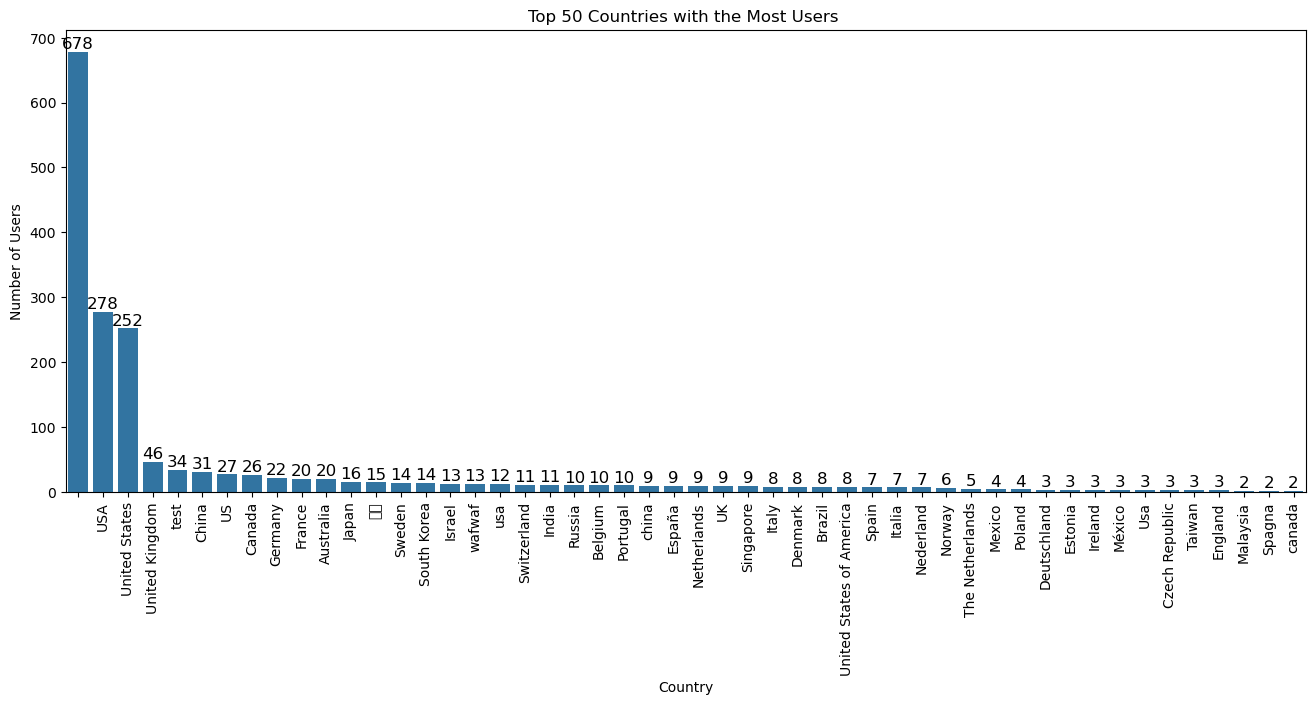

In [38]:
n = 50
df_filtered = df_profile[~df_profile['country'].str.contains(r'[^\w\s]', na=False)]
country_counts = df_filtered['country'].value_counts()
print(f'Total number of unique countries: {len(country_counts)}')
top_10_countries = country_counts.head(n)

# Plot the bar plot
plt.figure(figsize=(16, 6))
ax = sns.barplot(x=top_10_countries.index, y=top_10_countries.values)
for i, value in enumerate(top_10_countries.values):
    ax.text(i, value + 0.1, str(value), ha='center', va='bottom', fontsize=12)
# Add labels and title
plt.xlabel('Country')
plt.ylabel('Number of Users')
plt.title(f'Top {n} Countries with the Most Users ')

# Display the plot
plt.xticks(rotation=90)

plt.show()

## Look at Metadata Permission File (UUID is projectUUID)

In [39]:
metadata_perms_df
##
# metadata_perms_df[(metadata_perms_df['permission'] == 'READ_WRITE')].value_counts('username')

,id,last_updated,permission,username,uuid,tenant_id
0,5,2014-01-21 17:00:11,READ_WRITE,test3,0001389977207738-5056a550b8-0001-012,vdjserver.org
1,6,2014-01-21 17:00:41,READ_WRITE,test4,0001389977207738-5056a550b8-0001-012,vdjserver.org
2,9,2014-01-21 17:21:43,READ_WRITE,test11,0001389977207738-5056a550b8-0001-012,vdjserver.org
3,14,2014-01-29 10:28:16,READ_WRITE,jfonner,0001389977207738-5056a550b8-0001-012,vdjserver.org
4,17,2014-01-29 14:06:38,READ_WRITE,adshkl;dasfhkdf,0001391025968832-5056a550b8-0001-012,vdjserver.org
...,...,...,...,...,...,...
760590,1444986,2025-01-25 09:44:43,READ_WRITE,schristley,3580715269144908271-242ac118-0001-012,vdjserver.org
760591,1444987,2025-01-25 09:44:44,READ_WRITE,schristley,3569118857445708271-242ac118-0001-012,vdjserver.org
760592,1444988,2025-01-25 09:44:44,READ_WRITE,schristley,3557565395419468271-242ac118-0001-012,vdjserver.org
760593,1444989,2025-01-25 09:44:44,READ_WRITE,schristley,3547300423582028271-242ac118-0001-012,vdjserver.org


## Look at All the Jobs at VDJ Server

In [40]:
jobs_all_df.head()
## Filter AllJobs columns
#### Keeping only important ones
keep_columns = ['system_id', 'owner', 'app_id', 'status', 'last_updated', 'uuid', 'archive_path', 'remote_outcome', 'update_token', 'parameters.Creator']
jobs_all_df = jobs_all_df[keep_columns]
jobs_all_df

,system_id,owner,app_id,status,last_updated,uuid,archive_path,remote_outcome,update_token,parameters.Creator
0,ls6.tacc.utexas.edu,vdj,repcalc-ls6-2.0u8,FINISHED,2025-01-25 15:43:51.678,c7cd08ad-a560-4574-a363-b9cc4c5e051d-007,/projects/5456400192359305711-242ac118-0001-01...,FINISHED,eb27e311-4a37-4aeb-b649-056704dd2711,schristley
1,ls6.tacc.utexas.edu,vdj,igblast-ls6-1.20u6,FINISHED,2025-01-24 04:20:37.891,9188bf80-e868-4e05-a6b4-308c044108d7-007,/projects/5456400192359305711-242ac118-0001-01...,FINISHED,5e2528fd-25d6-4473-9287-6a67a8de8391,schristley
2,ls6.tacc.utexas.edu,vdj,igblast-ls6-1.20u6,FAILED,2025-01-22 15:04:46.891,773a5cb7-b369-4517-a221-83d57e3899e5-007,/projects/5199144433477554666-242ac116-0001-01...,FAILED_SKIP_ARCHIVE,78b89c14-3dec-4aa8-acf8-d2592064e3a4,scott_public
3,ls6.tacc.utexas.edu,vdj,vdj_pipe-ls6-0.1.7u2,FINISHED,2025-01-14 22:31:02.980,c0ab5f4a-97b0-4dc3-93e8-0908c95cb3a4-007,/projects/5456400192359305711-242ac118-0001-01...,FINISHED,1e2f122d-5e5b-4f14-931f-ca55803115ff,schristley
4,ls6.tacc.utexas.edu,vdj,vdj_pipe-ls6-0.1.7u2,FINISHED,2025-01-09 04:21:12.476,ad02cb34-250e-48cb-a06e-973e431b62ee-007,/projects/6589143665654501871-242ac118-0001-01...,FINISHED,1069949d-1d9a-453f-80b8-7372019aba31,schristley
...,...,...,...,...,...,...,...,...,...,...
15776,my-lonestar,jfonner,my-vdj_pipe-0.0.4,FINISHED,2014-03-31 16:38:39.000,0001396301879424-5056a550b8-0001-007,/scratch/01114/jfonner/vdj/analyses/foo123-201...,FINISHED,3b188d18-7955-49b6-bc21-10a557ced542,NaN
15777,my-lonestar,jfonner,my-vdj_pipe-0.0.4,FINISHED,2014-03-31 15:44:00.000,0001396298592090-5056a550b8-0001-007,/scratch/01114/jfonner/vdj/analyses/vdj_test20...,FINISHED,c9dd99e9-2ef2-4fd7-b211-26b56162b21e,NaN
15778,my-lonestar,jfonner,my-vdj_pipe-0.0.4,FINISHED,2014-03-31 15:35:18.000,0001396298085562-5056a550b8-0001-007,/scratch/01114/jfonner/vdj/analyses/vdj_test20...,FINISHED,282196b2-9972-4615-944d-777e1ee7826c,NaN
15779,my-lonestar,jfonner,my-vdj_pipe-0.0.4,FAILED,2014-03-31 15:28:36.000,0001396297676287-5056a550b8-0001-007,/scratch/01114/jfonner/vdj/analyses/vdj_test20...,FAILED,dc81e8a3-9869-47cc-8bee-3d254bb805d1,NaN


In [41]:
jobs_all_df[jobs_all_df.uuid == '8144122141623652841-242ac11c-0001-007']

,system_id,owner,app_id,status,last_updated,uuid,archive_path,remote_outcome,update_token,parameters.Creator
9999,ls5.tacc.utexas.edu,vdj,repcalc-ls5-1.0,FINISHED,2019-02-27 18:42:14.000,8144122141623652841-242ac11c-0001-007,/projects/7058216970366620136-242ac11e-0001-01...,FINISHED,fd7354e7-729c-4b42-97b6-2a9dd08bf0a0,schristley


## Look at JobEvents

In [42]:
job_events_df

,id,created,created_by,description,ip_address,status,tenant_id,job_id,transfertask,uuid
0,5476,2014-03-31 14:48:10,jfonner,Job accepted and queued for submission.,129.114.60.167,PENDING,vdjserver.org,142,NaN,None
1,5477,2014-03-31 14:48:20,jfonner,No inputs for the given job. Skipping staging,129.114.60.167,STAGED,vdjserver.org,142,NaN,None
2,5478,2014-03-31 14:48:30,jfonner,Attempt [1] Preparing job for execution and st...,129.114.60.167,SUBMITTING,vdjserver.org,142,NaN,None
3,5479,2014-03-31 14:50:18,jfonner,Failed to submit job 0001396295290656-5056a550...,129.114.60.167,FAILED,vdjserver.org,142,NaN,None
4,5480,2014-03-31 15:27:56,jfonner,Job accepted and queued for submission.,129.114.60.167,PENDING,vdjserver.org,143,NaN,None
...,...,...,...,...,...,...,...,...,...,...
341856,23585802,2025-01-25 15:38:25,vdj,Job running on execution system,172.17.0.5,RUNNING,vdjserver.org,503865,0.0,64c47eaa-102e-4106-bae7-4af2b2a3e3a0-028
341857,23585803,2025-01-25 15:43:33,vdj,Job completed execution,172.17.0.5,CLEANING_UP,vdjserver.org,503865,0.0,b62a2f3c-b5f6-4ba7-b764-e49091263b76-028
341858,23585804,2025-01-25 15:43:33,vdj,Transferring job output to archive system,172.17.0.5,ARCHIVING,vdjserver.org,503865,0.0,09c31ec9-7736-4d8a-a4dd-ead09386eea1-028
341859,23585805,2025-01-25 15:43:37,vdj,Job archiving in progress: agave://ls6.tacc.ut...,172.17.0.5,ARCHIVING,vdjserver.org,503865,560378724.0,d0d6f978-8813-4829-abe0-ce78c5dd326e-028


## Filter Metadata file by removing users with only READ Acess and Usernames that contains test

In [43]:
metadata_perms_df
#filter metadata keeping only items that has permission for both READ_WRITE and ALL
filtered_metadata_perms_df = metadata_perms_df[~(metadata_perms_df.permission == 'READ')]
# Filter out usernames containing 'test'
filtered_metadata_perms_df = filtered_metadata_perms_df[~filtered_metadata_perms_df['username'].str.contains('test', case=False)]

## Plot Number of Unique Users for Each Year

year
2014      741
2015     5495
2016    10172
2017    51812
2018    65288
2019    61059
2020    52641
2021    54077
2022    31584
2023    87717
2024    34663
2025     3887
Name: uuid, dtype: int64


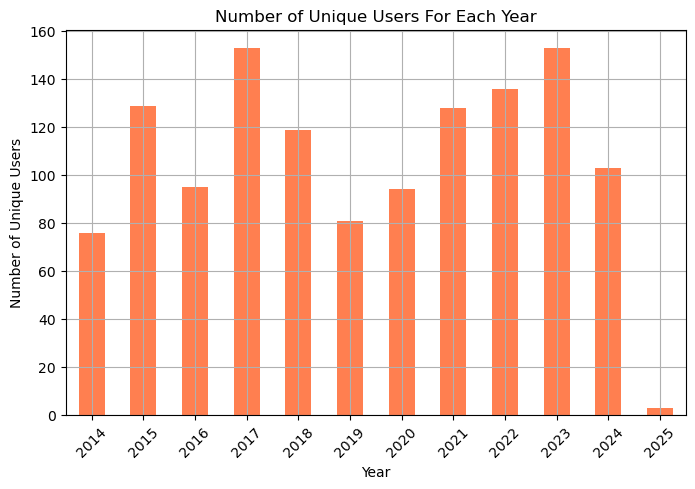

In [44]:
# Convert 'last_updated' to datetime format
df = filtered_metadata_perms_df
df['last_updated'] = pd.to_datetime(df['last_updated'])

 # Extract the year from 'last_updated'
df['year'] = df['last_updated'].dt.year

print(df.groupby('year')['uuid'].nunique())
# Count the number of unique users per year
unique_users_by_year = df.groupby('year')['username'].nunique()

# Plot the number of unique users per year
plt.figure(figsize=(8, 5))
unique_users_by_year.plot(kind='bar', color='coral')
plt.title('Number of Unique Users For Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Unique Users')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Plot Top n Users with Unique Projects

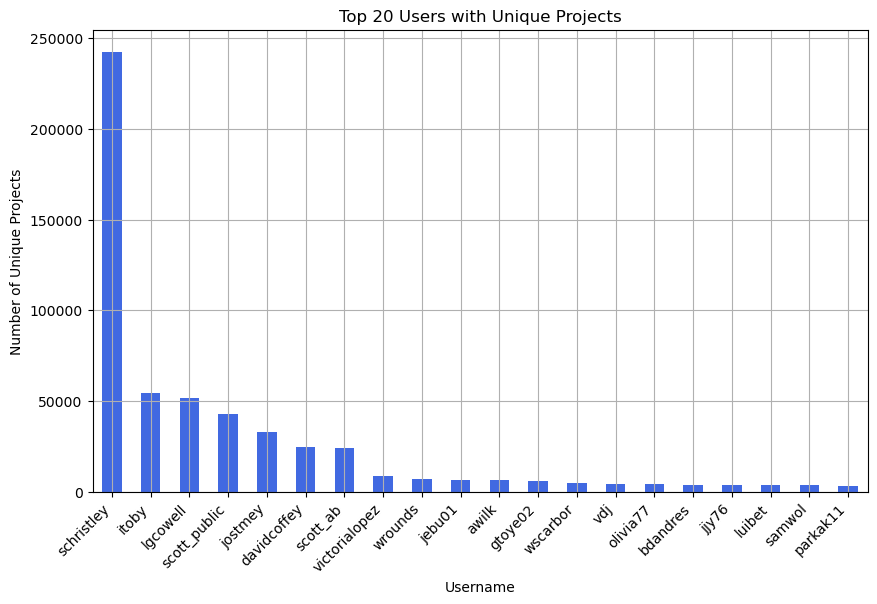

In [45]:
# number of unique users
n = 20
# Group by 'username' and count the number of unique 'id' (projects) each user has
user_unique_projects = df.groupby('username')['uuid'].nunique()
# Sort users by the number of unique projects (descending order)
top_n_users = user_unique_projects.sort_values(ascending=False).head(n)
# Plot the top 15 users with their unique number of projects
plt.figure(figsize=(10, 6))
top_n_users.plot(kind='bar', color='royalblue')
plt.title(f'Top {n} Users with Unique Projects')
plt.xlabel('Username')
plt.ylabel('Number of Unique Projects')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()



 ## Plot the Top n Users by Number of Projects in a Year

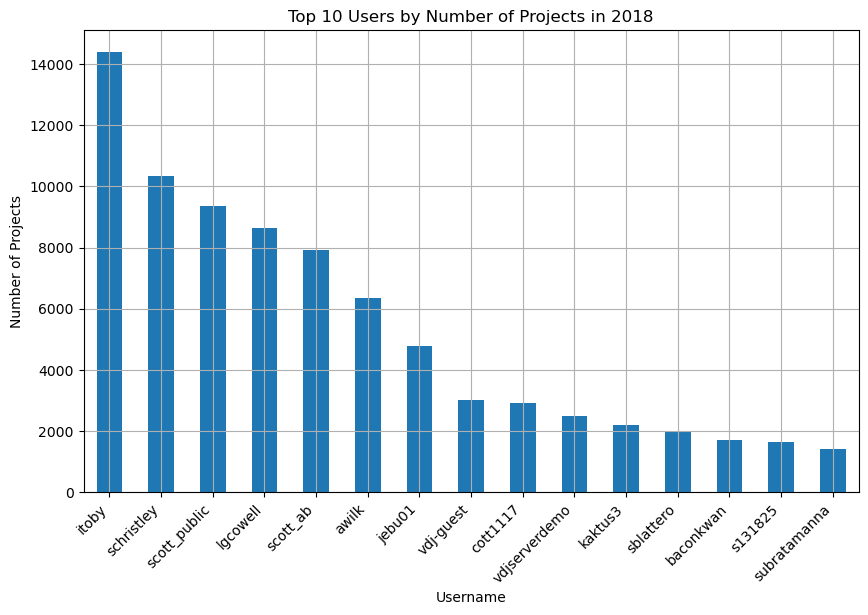

In [46]:

# number of unique users
n = 20# Filter the dataframe for a specific year, e.g., 2014
year_of_interest = 2018
# Group by 'username' and 'year' and count the number of records for each user in the specified year
user_project_counts = df[df['year'] == year_of_interest].groupby('username').size()

# Sort the users by the number of projects (in descending order)
top_15_users = user_project_counts.sort_values(ascending=False).head(15)

# Plot the top 10 users based on the number of projects (or records)
plt.figure(figsize=(10, 6))
top_15_users.plot(kind='bar')
plt.title(f'Top 10 Users by Number of Projects in {year_of_interest}')
plt.xlabel('Username')
plt.ylabel('Number of Projects')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

## For each Project How many Jobs are there?

In [47]:
df_projectJob

,uuid,owner,projectUuid,jobUuid,lastUpdated
0,0001400192074855-5056a550b8-0001-012,vdj,0001399309581559-5056a550b8-0001-012,0001399315558601-5056a550b8-0001-007,2014-05-15T17:14:34.855-05:00
1,0001400254373114-5056a550b8-0001-012,vdj,0001400250478554-5056a550b8-0001-012,0001400254372814-5056a550b8-0001-007,2014-05-16T10:32:53.114-05:00
2,0001400273862423-5056a550b8-0001-012,vdj,0001400250478554-5056a550b8-0001-012,0001400273862119-5056a550b8-0001-007,2014-05-16T15:57:42.423-05:00
3,0001400274448495-5056a550b8-0001-012,vdj,0001400250478554-5056a550b8-0001-012,0001400274448320-5056a550b8-0001-007,2014-05-16T16:07:28.494-05:00
4,0001400274714655-5056a550b8-0001-012,vdj,0001400250478554-5056a550b8-0001-012,0001400274714490-5056a550b8-0001-007,2014-05-16T16:11:54.655-05:00
...,...,...,...,...,...
6350,5097479121213854191-242ac118-0001-012,vdj,6589143665654501871-242ac118-0001-012,ad02cb34-250e-48cb-a06e-973e431b62ee-007,2025-01-08T12:13:35.460-06:00
6351,1948444895656078865-242ac118-0001-012,vdj,5456400192359305711-242ac118-0001-012,c0ab5f4a-97b0-4dc3-93e8-0908c95cb3a4-007,2025-01-13T16:44:05.995-06:00
6352,1819643224410746385-242ac118-0001-012,vdj,5199144433477554666-242ac116-0001-012,773a5cb7-b369-4517-a221-83d57e3899e5-007,2025-01-20T03:06:57.762-06:00
6353,2845695380777266705-242ac118-0001-012,vdj,5456400192359305711-242ac118-0001-012,9188bf80-e868-4e05-a6b4-308c044108d7-007,2025-01-23T15:05:59.570-06:00


In [48]:
print(f'Total number of ProjectJob: \t\t\t\t{df_projectJob.shape[0]}')
print(f'Total number of Unique projectUuid: \t\t\t{df_projectJob.projectUuid.nunique()}')

#Filter projectJob Based on Metadata permission file
filtered_df_projectJob = df_projectJob[df_projectJob.projectUuid.isin(filtered_metadata_perms_df['uuid'])]
print(f'Total number of Unique projectUuid after filtration: \t{filtered_df_projectJob.projectUuid.nunique()}')

filtered_df_projectJob

Total number of ProjectJob: 				6355
Total number of Unique projectUuid: 			1086
Total number of Unique projectUuid after filtration: 	890


,uuid,owner,projectUuid,jobUuid,lastUpdated
36,0001402415655966-5056a550b8-0001-012,vdj,0001402413135675-5056a550b8-0001-012,0001402415655772-5056a550b8-0001-007,2017-01-12T17:35:19.626-06:00
37,0001402584065947-5056a550b8-0001-012,vdj,0001402413135675-5056a550b8-0001-012,0001402584065562-5056a550b8-0001-007,2017-01-12T17:35:16.665-06:00
64,0001404239409839-5056a550b8-0001-012,vdj,0001402413135675-5056a550b8-0001-012,0001404239409637-5056a550b8-0001-007,2017-01-12T17:35:13.705-06:00
157,0001410472799189-5056a550b8-0001-012,vdj,0001410472310261-5056a550b8-0001-012,0001410472799004-5056a550b8-0001-007,2017-01-12T17:36:48.130-06:00
214,0001415039388759-5056a550b8-0001-012,vdj,0001415029221897-5056a550b8-0001-012,0001415039388481-5056a550b8-0001-007,2017-01-12T17:37:17.842-06:00
...,...,...,...,...,...
6350,5097479121213854191-242ac118-0001-012,vdj,6589143665654501871-242ac118-0001-012,ad02cb34-250e-48cb-a06e-973e431b62ee-007,2025-01-08T12:13:35.460-06:00
6351,1948444895656078865-242ac118-0001-012,vdj,5456400192359305711-242ac118-0001-012,c0ab5f4a-97b0-4dc3-93e8-0908c95cb3a4-007,2025-01-13T16:44:05.995-06:00
6352,1819643224410746385-242ac118-0001-012,vdj,5199144433477554666-242ac116-0001-012,773a5cb7-b369-4517-a221-83d57e3899e5-007,2025-01-20T03:06:57.762-06:00
6353,2845695380777266705-242ac118-0001-012,vdj,5456400192359305711-242ac118-0001-012,9188bf80-e868-4e05-a6b4-308c044108d7-007,2025-01-23T15:05:59.570-06:00


## Number of Unique ProjectUUID Each Year for filtered_df_projectJob

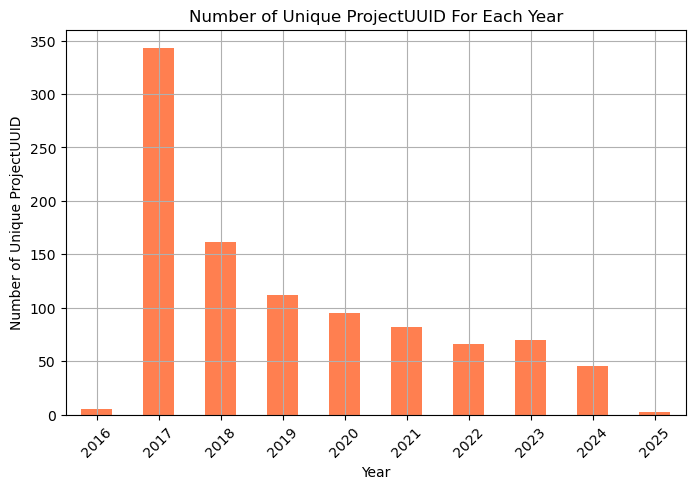

In [49]:
df = filtered_df_projectJob.copy()
df['lastUpdated'] = pd.to_datetime(df['lastUpdated'],  utc=True)
 # Extract the year from 'last_updated'
df['lastUpdated'] = df['lastUpdated'].dt.year
#Count the number of unique users per year
unique_users_by_year = df.groupby('lastUpdated')['projectUuid'].nunique()
# Plot the number of unique users per year
plt.figure(figsize=(8, 5))
unique_users_by_year.plot(kind='bar', color='coral')
plt.title('Number of Unique ProjectUUID For Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Unique ProjectUUID')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [50]:
# # number of unique users
# n = 20
# # Group by 'username' and count the number of unique 'id' (projects) each user has
# user_unique_projects = filtered_df_projectJob.groupby('username')['uuid'].nunique()
# # Sort users by the number of unique projects (descending order)
# top_n_users = user_unique_projects.sort_values(ascending=False).head(n)
# # Plot the top 15 users with their unique number of projects
# plt.figure(figsize=(10, 6))
# top_n_users.plot(kind='bar', color='royalblue')
# plt.title(f'Top {n} Users with Unique Projects')
# plt.xlabel('Username')
# plt.ylabel('Number of Unique Projects')
# plt.xticks(rotation=45, ha='right')
# plt.grid(True)
# plt.show()

In [51]:
df_projectJob.projectUuid.value_counts()

projectUuid
0001430750947192-5056a550b8-0001-012     121
3057760388135251475-242ac11a-0001-012    114
0001428091338341-5056a550b8-0001-012     103
5199144433477554666-242ac116-0001-012    100
46850669884665370-242ac114-0001-012       73
                                        ... 
8068155099655311846-242ac11c-0001-012      1
5211345989129277926-242ac11c-0001-012      1
7349712692870124006-242ac11c-0001-012      1
7671983811578696166-242ac11c-0001-012      1
4542076765918597606-242ac11c-0001-012      1
Name: count, Length: 1086, dtype: int64

In [52]:
filtered_projectFiles = df_projectFiles[df_projectFiles.projectUuid.isin(filtered_metadata_perms_df['uuid'])]
filtered_projectFiles

,uuid,projectUuid,associationIds_1,associationIds_2,owner,task_type,file_name,mimeType,last_updated
1,0001396029083309-5056a550b8-0001-012,0001395346788177-5056a550b8-0001-012,0001395939852441-5056a550b8-0001-002,None,vdjauth,uploaded,gitprep-latest.zip,application/zip,2014-03-28T12:51:23.309-05:00
2,0001396029805022-5056a550b8-0001-012,0001395346788177-5056a550b8-0001-012,0001395956517022-5056a550b8-0001-002,None,vdjauth,uploaded,Induction-28.zip,application/zip,2014-03-28T13:03:25.022-05:00
3,0001396030144907-5056a550b8-0001-012,0001395346788177-5056a550b8-0001-012,0001396030144691-5056a550b8-0001-002,None,vdjauth,uploaded,test10.txt,text/plain,2014-03-28T13:09:04.907-05:00
4,0001396039988083-5056a550b8-0001-012,0001395346788177-5056a550b8-0001-012,0001396039987794-5056a550b8-0001-002,None,vdjauth,uploaded,test11.txt,text/plain,2014-03-28T15:53:08.083-05:00
5,0001396043273330-5056a550b8-0001-012,0001395346788177-5056a550b8-0001-012,0001396043273029-5056a550b8-0001-002,None,vdjauth,uploaded,test14.txt,text/plain,2014-03-28T16:47:53.330-05:00
...,...,...,...,...,...,...,...,...,...
35943,5338423137409494545-242ac118-0001-012,5456400192359305711-242ac118-0001-012,6793987554023894545-242ac112-0001-002,5456400192359305711-242ac118-0001-012,vdj,None,4468_S24_L001_R1_001.fastq.gz,None,2025-01-13T16:40:40.230-06:00
35944,1335427718191574545-242ac118-0001-012,5456400192359305711-242ac118-0001-012,2833383462017494545-242ac112-0001-002,5456400192359305711-242ac118-0001-012,vdj,None,4468_S24_L001_R2_001.fastq.gz,None,2025-01-13T16:40:40.230-06:00
35945,1840700597200490991-242ac118-0001-012,5456400192359305711-242ac118-0001-012,366925519251050991-242ac112-0001-002,5456400192359305711-242ac118-0001-012,vdj,None,6634_S25_L001_R1_001.fastq.gz,None,2025-01-13T16:40:43.277-06:00
35946,5023614960920170991-242ac118-0001-012,5456400192359305711-242ac118-0001-012,3549539235260010991-242ac112-0001-002,5456400192359305711-242ac118-0001-012,vdj,None,6634_S25_L001_R2_001.fastq.gz,None,2025-01-13T16:40:43.281-06:00


In [53]:
df_projectFiles.task_type.nunique()
df_projectFiles.associationIds_1.nunique()
df_projectFiles.projectUuid.value_counts()
df_projectFiles

,uuid,projectUuid,associationIds_1,associationIds_2,owner,task_type,file_name,mimeType,last_updated
0,0001395955349445-5056a550b8-0001-012,,None,None,vdjauth,,None,None,2014-03-27T16:22:29.444-05:00
1,0001396029083309-5056a550b8-0001-012,0001395346788177-5056a550b8-0001-012,0001395939852441-5056a550b8-0001-002,None,vdjauth,uploaded,gitprep-latest.zip,application/zip,2014-03-28T12:51:23.309-05:00
2,0001396029805022-5056a550b8-0001-012,0001395346788177-5056a550b8-0001-012,0001395956517022-5056a550b8-0001-002,None,vdjauth,uploaded,Induction-28.zip,application/zip,2014-03-28T13:03:25.022-05:00
3,0001396030144907-5056a550b8-0001-012,0001395346788177-5056a550b8-0001-012,0001396030144691-5056a550b8-0001-002,None,vdjauth,uploaded,test10.txt,text/plain,2014-03-28T13:09:04.907-05:00
4,0001396039988083-5056a550b8-0001-012,0001395346788177-5056a550b8-0001-012,0001396039987794-5056a550b8-0001-002,None,vdjauth,uploaded,test11.txt,text/plain,2014-03-28T15:53:08.083-05:00
...,...,...,...,...,...,...,...,...,...
35943,5338423137409494545-242ac118-0001-012,5456400192359305711-242ac118-0001-012,6793987554023894545-242ac112-0001-002,5456400192359305711-242ac118-0001-012,vdj,None,4468_S24_L001_R1_001.fastq.gz,None,2025-01-13T16:40:40.230-06:00
35944,1335427718191574545-242ac118-0001-012,5456400192359305711-242ac118-0001-012,2833383462017494545-242ac112-0001-002,5456400192359305711-242ac118-0001-012,vdj,None,4468_S24_L001_R2_001.fastq.gz,None,2025-01-13T16:40:40.230-06:00
35945,1840700597200490991-242ac118-0001-012,5456400192359305711-242ac118-0001-012,366925519251050991-242ac112-0001-002,5456400192359305711-242ac118-0001-012,vdj,None,6634_S25_L001_R1_001.fastq.gz,None,2025-01-13T16:40:43.277-06:00
35946,5023614960920170991-242ac118-0001-012,5456400192359305711-242ac118-0001-012,3549539235260010991-242ac112-0001-002,5456400192359305711-242ac118-0001-012,vdj,None,6634_S25_L001_R2_001.fastq.gz,None,2025-01-13T16:40:43.281-06:00


In [54]:
filtered_df_projectFiles = df_projectFiles[df_projectFiles.projectUuid.isin(filtered_metadata_perms_df['uuid'])]
filtered_df_projectFiles

,uuid,projectUuid,associationIds_1,associationIds_2,owner,task_type,file_name,mimeType,last_updated
1,0001396029083309-5056a550b8-0001-012,0001395346788177-5056a550b8-0001-012,0001395939852441-5056a550b8-0001-002,None,vdjauth,uploaded,gitprep-latest.zip,application/zip,2014-03-28T12:51:23.309-05:00
2,0001396029805022-5056a550b8-0001-012,0001395346788177-5056a550b8-0001-012,0001395956517022-5056a550b8-0001-002,None,vdjauth,uploaded,Induction-28.zip,application/zip,2014-03-28T13:03:25.022-05:00
3,0001396030144907-5056a550b8-0001-012,0001395346788177-5056a550b8-0001-012,0001396030144691-5056a550b8-0001-002,None,vdjauth,uploaded,test10.txt,text/plain,2014-03-28T13:09:04.907-05:00
4,0001396039988083-5056a550b8-0001-012,0001395346788177-5056a550b8-0001-012,0001396039987794-5056a550b8-0001-002,None,vdjauth,uploaded,test11.txt,text/plain,2014-03-28T15:53:08.083-05:00
5,0001396043273330-5056a550b8-0001-012,0001395346788177-5056a550b8-0001-012,0001396043273029-5056a550b8-0001-002,None,vdjauth,uploaded,test14.txt,text/plain,2014-03-28T16:47:53.330-05:00
...,...,...,...,...,...,...,...,...,...
35943,5338423137409494545-242ac118-0001-012,5456400192359305711-242ac118-0001-012,6793987554023894545-242ac112-0001-002,5456400192359305711-242ac118-0001-012,vdj,None,4468_S24_L001_R1_001.fastq.gz,None,2025-01-13T16:40:40.230-06:00
35944,1335427718191574545-242ac118-0001-012,5456400192359305711-242ac118-0001-012,2833383462017494545-242ac112-0001-002,5456400192359305711-242ac118-0001-012,vdj,None,4468_S24_L001_R2_001.fastq.gz,None,2025-01-13T16:40:40.230-06:00
35945,1840700597200490991-242ac118-0001-012,5456400192359305711-242ac118-0001-012,366925519251050991-242ac112-0001-002,5456400192359305711-242ac118-0001-012,vdj,None,6634_S25_L001_R1_001.fastq.gz,None,2025-01-13T16:40:43.277-06:00
35946,5023614960920170991-242ac118-0001-012,5456400192359305711-242ac118-0001-012,3549539235260010991-242ac112-0001-002,5456400192359305711-242ac118-0001-012,vdj,None,6634_S25_L001_R2_001.fastq.gz,None,2025-01-13T16:40:43.281-06:00


In [55]:
df_projectFiles.projectUuid.nunique()

1916

In [56]:
filtered_df_projectFiles.projectUuid.nunique()

1223

In [57]:
filtered_jobs_all_df = jobs_all_df[jobs_all_df.uuid.isin(filtered_df_projectJob['jobUuid'])]
filtered_jobs_all_df

,system_id,owner,app_id,status,last_updated,uuid,archive_path,remote_outcome,update_token,parameters.Creator
0,ls6.tacc.utexas.edu,vdj,repcalc-ls6-2.0u8,FINISHED,2025-01-25 15:43:51.678,c7cd08ad-a560-4574-a363-b9cc4c5e051d-007,/projects/5456400192359305711-242ac118-0001-01...,FINISHED,eb27e311-4a37-4aeb-b649-056704dd2711,schristley
1,ls6.tacc.utexas.edu,vdj,igblast-ls6-1.20u6,FINISHED,2025-01-24 04:20:37.891,9188bf80-e868-4e05-a6b4-308c044108d7-007,/projects/5456400192359305711-242ac118-0001-01...,FINISHED,5e2528fd-25d6-4473-9287-6a67a8de8391,schristley
2,ls6.tacc.utexas.edu,vdj,igblast-ls6-1.20u6,FAILED,2025-01-22 15:04:46.891,773a5cb7-b369-4517-a221-83d57e3899e5-007,/projects/5199144433477554666-242ac116-0001-01...,FAILED_SKIP_ARCHIVE,78b89c14-3dec-4aa8-acf8-d2592064e3a4,scott_public
3,ls6.tacc.utexas.edu,vdj,vdj_pipe-ls6-0.1.7u2,FINISHED,2025-01-14 22:31:02.980,c0ab5f4a-97b0-4dc3-93e8-0908c95cb3a4-007,/projects/5456400192359305711-242ac118-0001-01...,FINISHED,1e2f122d-5e5b-4f14-931f-ca55803115ff,schristley
4,ls6.tacc.utexas.edu,vdj,vdj_pipe-ls6-0.1.7u2,FINISHED,2025-01-09 04:21:12.476,ad02cb34-250e-48cb-a06e-973e431b62ee-007,/projects/6589143665654501871-242ac118-0001-01...,FINISHED,1069949d-1d9a-453f-80b8-7372019aba31,schristley
...,...,...,...,...,...,...,...,...,...,...
15515,lonestar.tacc.utexas.edu,mlevin,vdj_pipe-0.0.16u2,FINISHED,2014-11-04 18:33:43.000,0001415039388481-5056a550b8-0001-007,/projects/0001415029221897-5056a550b8-0001-012...,FINISHED,f1941c26-0827-4812-a7e3-c03e6ba53803,NaN
15574,lonestar.tacc.utexas.edu,mlevin,vdj_pipe-0.0.16u2,FINISHED,2014-09-11 17:09:18.000,0001410472799004-5056a550b8-0001-007,/projects/0001410472310261-5056a550b8-0001-012...,FINISHED,522d82f1-159e-4b9e-8766-3ad0a23b6985,NaN
15672,lonestar.tacc.utexas.edu,esalina,vdj_pipe-0.0.12u1,FINISHED,2014-07-01 13:34:09.000,0001404239409637-5056a550b8-0001-007,/projects/0001402413135675-5056a550b8-0001-012...,FINISHED,5300feea-5337-4955-aa40-8a4c9b955e5d,NaN
15700,lonestar.tacc.utexas.edu,esalina,vdj_pipe-0.0.12u1,FINISHED,2014-06-12 09:43:38.000,0001402584065562-5056a550b8-0001-007,/projects/0001402413135675-5056a550b8-0001-012...,FINISHED,eded8505-6fc6-477a-b5c5-ffb3e50eb731,NaN


In [58]:
filtered_jobs_all_df['parameters.Creator'].value_counts()
filtered_jobs_all_df['uuid'].value_counts()
jobs_all_df


,system_id,owner,app_id,status,last_updated,uuid,archive_path,remote_outcome,update_token,parameters.Creator
0,ls6.tacc.utexas.edu,vdj,repcalc-ls6-2.0u8,FINISHED,2025-01-25 15:43:51.678,c7cd08ad-a560-4574-a363-b9cc4c5e051d-007,/projects/5456400192359305711-242ac118-0001-01...,FINISHED,eb27e311-4a37-4aeb-b649-056704dd2711,schristley
1,ls6.tacc.utexas.edu,vdj,igblast-ls6-1.20u6,FINISHED,2025-01-24 04:20:37.891,9188bf80-e868-4e05-a6b4-308c044108d7-007,/projects/5456400192359305711-242ac118-0001-01...,FINISHED,5e2528fd-25d6-4473-9287-6a67a8de8391,schristley
2,ls6.tacc.utexas.edu,vdj,igblast-ls6-1.20u6,FAILED,2025-01-22 15:04:46.891,773a5cb7-b369-4517-a221-83d57e3899e5-007,/projects/5199144433477554666-242ac116-0001-01...,FAILED_SKIP_ARCHIVE,78b89c14-3dec-4aa8-acf8-d2592064e3a4,scott_public
3,ls6.tacc.utexas.edu,vdj,vdj_pipe-ls6-0.1.7u2,FINISHED,2025-01-14 22:31:02.980,c0ab5f4a-97b0-4dc3-93e8-0908c95cb3a4-007,/projects/5456400192359305711-242ac118-0001-01...,FINISHED,1e2f122d-5e5b-4f14-931f-ca55803115ff,schristley
4,ls6.tacc.utexas.edu,vdj,vdj_pipe-ls6-0.1.7u2,FINISHED,2025-01-09 04:21:12.476,ad02cb34-250e-48cb-a06e-973e431b62ee-007,/projects/6589143665654501871-242ac118-0001-01...,FINISHED,1069949d-1d9a-453f-80b8-7372019aba31,schristley
...,...,...,...,...,...,...,...,...,...,...
15776,my-lonestar,jfonner,my-vdj_pipe-0.0.4,FINISHED,2014-03-31 16:38:39.000,0001396301879424-5056a550b8-0001-007,/scratch/01114/jfonner/vdj/analyses/foo123-201...,FINISHED,3b188d18-7955-49b6-bc21-10a557ced542,NaN
15777,my-lonestar,jfonner,my-vdj_pipe-0.0.4,FINISHED,2014-03-31 15:44:00.000,0001396298592090-5056a550b8-0001-007,/scratch/01114/jfonner/vdj/analyses/vdj_test20...,FINISHED,c9dd99e9-2ef2-4fd7-b211-26b56162b21e,NaN
15778,my-lonestar,jfonner,my-vdj_pipe-0.0.4,FINISHED,2014-03-31 15:35:18.000,0001396298085562-5056a550b8-0001-007,/scratch/01114/jfonner/vdj/analyses/vdj_test20...,FINISHED,282196b2-9972-4615-944d-777e1ee7826c,NaN
15779,my-lonestar,jfonner,my-vdj_pipe-0.0.4,FAILED,2014-03-31 15:28:36.000,0001396297676287-5056a550b8-0001-007,/scratch/01114/jfonner/vdj/analyses/vdj_test20...,FAILED,dc81e8a3-9869-47cc-8bee-3d254bb805d1,NaN


In [59]:
print(filtered_df_projectJob.shape)
filtered_df_projectJob.head()

(5505, 5)


,uuid,owner,projectUuid,jobUuid,lastUpdated
36,0001402415655966-5056a550b8-0001-012,vdj,0001402413135675-5056a550b8-0001-012,0001402415655772-5056a550b8-0001-007,2017-01-12T17:35:19.626-06:00
37,0001402584065947-5056a550b8-0001-012,vdj,0001402413135675-5056a550b8-0001-012,0001402584065562-5056a550b8-0001-007,2017-01-12T17:35:16.665-06:00
64,0001404239409839-5056a550b8-0001-012,vdj,0001402413135675-5056a550b8-0001-012,0001404239409637-5056a550b8-0001-007,2017-01-12T17:35:13.705-06:00
157,0001410472799189-5056a550b8-0001-012,vdj,0001410472310261-5056a550b8-0001-012,0001410472799004-5056a550b8-0001-007,2017-01-12T17:36:48.130-06:00
214,0001415039388759-5056a550b8-0001-012,vdj,0001415029221897-5056a550b8-0001-012,0001415039388481-5056a550b8-0001-007,2017-01-12T17:37:17.842-06:00


In [60]:
print(filtered_metadata_perms_df.shape)
filtered_metadata_perms_df.head()

(642544, 7)


,id,last_updated,permission,username,uuid,tenant_id,year
3,14,2014-01-29 10:28:16,READ_WRITE,jfonner,0001389977207738-5056a550b8-0001-012,vdjserver.org,2014
4,17,2014-01-29 14:06:38,READ_WRITE,adshkl;dasfhkdf,0001391025968832-5056a550b8-0001-012,vdjserver.org,2014
5,18,2014-02-20 10:07:51,READ_WRITE,VDJAuth,0001392912471365-5056a550b8-0001-012,vdjserver.org,2014
6,19,2014-02-20 10:14:20,READ_WRITE,VDJAuth,0001392912860303-5056a550b8-0001-012,vdjserver.org,2014
7,21,2014-02-20 11:10:54,READ_WRITE,wscarbor,0001392914178983-5056a550b8-0001-012,vdjserver.org,2014


In [61]:
print(filtered_df_projectFiles.shape)
filtered_df_projectFiles.head()

(29194, 9)


,uuid,projectUuid,associationIds_1,associationIds_2,owner,task_type,file_name,mimeType,last_updated
1,0001396029083309-5056a550b8-0001-012,0001395346788177-5056a550b8-0001-012,0001395939852441-5056a550b8-0001-002,None,vdjauth,uploaded,gitprep-latest.zip,application/zip,2014-03-28T12:51:23.309-05:00
2,0001396029805022-5056a550b8-0001-012,0001395346788177-5056a550b8-0001-012,0001395956517022-5056a550b8-0001-002,None,vdjauth,uploaded,Induction-28.zip,application/zip,2014-03-28T13:03:25.022-05:00
3,0001396030144907-5056a550b8-0001-012,0001395346788177-5056a550b8-0001-012,0001396030144691-5056a550b8-0001-002,None,vdjauth,uploaded,test10.txt,text/plain,2014-03-28T13:09:04.907-05:00
4,0001396039988083-5056a550b8-0001-012,0001395346788177-5056a550b8-0001-012,0001396039987794-5056a550b8-0001-002,None,vdjauth,uploaded,test11.txt,text/plain,2014-03-28T15:53:08.083-05:00
5,0001396043273330-5056a550b8-0001-012,0001395346788177-5056a550b8-0001-012,0001396043273029-5056a550b8-0001-002,None,vdjauth,uploaded,test14.txt,text/plain,2014-03-28T16:47:53.330-05:00


In [62]:
print(filtered_jobs_all_df.shape)
filtered_jobs_all_df.head()

(5477, 10)


,system_id,owner,app_id,status,last_updated,uuid,archive_path,remote_outcome,update_token,parameters.Creator
0,ls6.tacc.utexas.edu,vdj,repcalc-ls6-2.0u8,FINISHED,2025-01-25 15:43:51.678,c7cd08ad-a560-4574-a363-b9cc4c5e051d-007,/projects/5456400192359305711-242ac118-0001-01...,FINISHED,eb27e311-4a37-4aeb-b649-056704dd2711,schristley
1,ls6.tacc.utexas.edu,vdj,igblast-ls6-1.20u6,FINISHED,2025-01-24 04:20:37.891,9188bf80-e868-4e05-a6b4-308c044108d7-007,/projects/5456400192359305711-242ac118-0001-01...,FINISHED,5e2528fd-25d6-4473-9287-6a67a8de8391,schristley
2,ls6.tacc.utexas.edu,vdj,igblast-ls6-1.20u6,FAILED,2025-01-22 15:04:46.891,773a5cb7-b369-4517-a221-83d57e3899e5-007,/projects/5199144433477554666-242ac116-0001-01...,FAILED_SKIP_ARCHIVE,78b89c14-3dec-4aa8-acf8-d2592064e3a4,scott_public
3,ls6.tacc.utexas.edu,vdj,vdj_pipe-ls6-0.1.7u2,FINISHED,2025-01-14 22:31:02.980,c0ab5f4a-97b0-4dc3-93e8-0908c95cb3a4-007,/projects/5456400192359305711-242ac118-0001-01...,FINISHED,1e2f122d-5e5b-4f14-931f-ca55803115ff,schristley
4,ls6.tacc.utexas.edu,vdj,vdj_pipe-ls6-0.1.7u2,FINISHED,2025-01-09 04:21:12.476,ad02cb34-250e-48cb-a06e-973e431b62ee-007,/projects/6589143665654501871-242ac118-0001-01...,FINISHED,1069949d-1d9a-453f-80b8-7372019aba31,schristley


In [63]:
filtered_jobs_all_df.iloc[0]['archive_path']

'/projects/5456400192359305711-242ac118-0001-012/analyses/2025-01-25-02-57-35-54-my-job-24-jan-2025-8:57:09-pm'

In [64]:
project_uuid = '5456400192359305711-242ac118-0001-012'
filtered_df_projectFiles[filtered_df_projectFiles.projectUuid == project_uuid]

,uuid,projectUuid,associationIds_1,associationIds_2,owner,task_type,file_name,mimeType,last_updated
35923,7235888630211276305-242ac118-0001-012,5456400192359305711-242ac118-0001-012,8704853344789196305-242ac112-0001-002,5456400192359305711-242ac118-0001-012,vdj,None,UTSW3_S41_L001_R2_001.fastq.gz,None,2025-01-13T16:40:05.824-06:00
35924,5435653088092876305-242ac118-0001-012,5456400192359305711-242ac118-0001-012,6303726458799395311-242ac112-0001-002,5456400192359305711-242ac118-0001-012,vdj,None,UTSW3_S41_L001_R1_001.fastq.gz,None,2025-01-13T16:40:05.774-06:00
35925,4056925636403916305-242ac118-0001-012,5456400192359305711-242ac118-0001-012,5515926026855116305-242ac112-0001-002,5456400192359305711-242ac118-0001-012,vdj,None,UTSW33_S42_L001_R1_001.fastq.gz,None,2025-01-13T16:40:09.288-06:00
35926,364542252032716305-242ac118-0001-012,5456400192359305711-242ac118-0001-012,1826420270572236305-242ac112-0001-002,5456400192359305711-242ac118-0001-012,vdj,None,UTSW33_S42_L001_R2_001.fastq.gz,None,2025-01-13T16:40:09.197-06:00
35927,1356193445436789231-242ac118-0001-012,5456400192359305711-242ac118-0001-012,98898524775116305-242ac112-0001-002,5456400192359305711-242ac118-0001-012,vdj,None,UTSW34_S43_L001_R1_001.fastq.gz,None,2025-01-13T16:40:12.427-06:00
35928,3037157745745269231-242ac118-0001-012,5456400192359305711-242ac118-0001-012,1563855114198389231-242ac112-0001-002,5456400192359305711-242ac118-0001-012,vdj,None,UTSW34_S43_L001_R2_001.fastq.gz,None,2025-01-13T16:40:12.462-06:00
35929,8703939788065402385-242ac118-0001-012,5456400192359305711-242ac118-0001-012,8250904445705589231-242ac112-0001-002,5456400192359305711-242ac118-0001-012,vdj,None,0436_S17_L001_R1_001.fastq.gz,None,2025-01-13T16:40:16.264-06:00
35930,5832496452651642385-242ac118-0001-012,5456400192359305711-242ac118-0001-012,7280888273881722385-242ac112-0001-002,5456400192359305711-242ac118-0001-012,vdj,None,0436_S17_L001_R2_001.fastq.gz,None,2025-01-13T16:40:16.297-06:00
35931,2306929598057082385-242ac118-0001-012,5456400192359305711-242ac118-0001-012,3790067704711802385-242ac112-0001-002,5456400192359305711-242ac118-0001-012,vdj,None,0830_S18_L001_R1_001.fastq.gz,None,2025-01-13T16:40:19.713-06:00
35932,1173454200583623151-242ac118-0001-012,5456400192359305711-242ac118-0001-012,311831389719162385-242ac112-0001-002,5456400192359305711-242ac118-0001-012,vdj,None,0830_S18_L001_R2_001.fastq.gz,None,2025-01-13T16:40:19.708-06:00


In [65]:
jobs_all_df

,system_id,owner,app_id,status,last_updated,uuid,archive_path,remote_outcome,update_token,parameters.Creator
0,ls6.tacc.utexas.edu,vdj,repcalc-ls6-2.0u8,FINISHED,2025-01-25 15:43:51.678,c7cd08ad-a560-4574-a363-b9cc4c5e051d-007,/projects/5456400192359305711-242ac118-0001-01...,FINISHED,eb27e311-4a37-4aeb-b649-056704dd2711,schristley
1,ls6.tacc.utexas.edu,vdj,igblast-ls6-1.20u6,FINISHED,2025-01-24 04:20:37.891,9188bf80-e868-4e05-a6b4-308c044108d7-007,/projects/5456400192359305711-242ac118-0001-01...,FINISHED,5e2528fd-25d6-4473-9287-6a67a8de8391,schristley
2,ls6.tacc.utexas.edu,vdj,igblast-ls6-1.20u6,FAILED,2025-01-22 15:04:46.891,773a5cb7-b369-4517-a221-83d57e3899e5-007,/projects/5199144433477554666-242ac116-0001-01...,FAILED_SKIP_ARCHIVE,78b89c14-3dec-4aa8-acf8-d2592064e3a4,scott_public
3,ls6.tacc.utexas.edu,vdj,vdj_pipe-ls6-0.1.7u2,FINISHED,2025-01-14 22:31:02.980,c0ab5f4a-97b0-4dc3-93e8-0908c95cb3a4-007,/projects/5456400192359305711-242ac118-0001-01...,FINISHED,1e2f122d-5e5b-4f14-931f-ca55803115ff,schristley
4,ls6.tacc.utexas.edu,vdj,vdj_pipe-ls6-0.1.7u2,FINISHED,2025-01-09 04:21:12.476,ad02cb34-250e-48cb-a06e-973e431b62ee-007,/projects/6589143665654501871-242ac118-0001-01...,FINISHED,1069949d-1d9a-453f-80b8-7372019aba31,schristley
...,...,...,...,...,...,...,...,...,...,...
15776,my-lonestar,jfonner,my-vdj_pipe-0.0.4,FINISHED,2014-03-31 16:38:39.000,0001396301879424-5056a550b8-0001-007,/scratch/01114/jfonner/vdj/analyses/foo123-201...,FINISHED,3b188d18-7955-49b6-bc21-10a557ced542,NaN
15777,my-lonestar,jfonner,my-vdj_pipe-0.0.4,FINISHED,2014-03-31 15:44:00.000,0001396298592090-5056a550b8-0001-007,/scratch/01114/jfonner/vdj/analyses/vdj_test20...,FINISHED,c9dd99e9-2ef2-4fd7-b211-26b56162b21e,NaN
15778,my-lonestar,jfonner,my-vdj_pipe-0.0.4,FINISHED,2014-03-31 15:35:18.000,0001396298085562-5056a550b8-0001-007,/scratch/01114/jfonner/vdj/analyses/vdj_test20...,FINISHED,282196b2-9972-4615-944d-777e1ee7826c,NaN
15779,my-lonestar,jfonner,my-vdj_pipe-0.0.4,FAILED,2014-03-31 15:28:36.000,0001396297676287-5056a550b8-0001-007,/scratch/01114/jfonner/vdj/analyses/vdj_test20...,FAILED,dc81e8a3-9869-47cc-8bee-3d254bb805d1,NaN


In [66]:
all_jobs_list = []
other_folders = set()
for i in range(len(jobs_all_df)):
    archive_path = jobs_all_df['archive_path'][i]
    # Check if the 'archive_path' is not None or NaN and contains at least one '/'
    if pd.notna(archive_path) and '/' in archive_path:
        split_path = archive_path.split('/')
        if len(split_path) > 3:  # Ensure there is at least two elements after splitting
            app_id = jobs_all_df['app_id'][i]
            status = jobs_all_df['status'][i]
            project_folder = split_path[1]
            if project_folder in ['community']:
                projectUUID = split_path[3] #nor sure if 3rd or 5th
                print(json.dumps(archive_path, indent = 4))
                break
            elif project_folder in ['projects']:
                projectUUID = split_path[2]
            else:
                projectUUID = split_path[2]
            JobUuid = jobs_all_df['uuid'][i]
            remote_outcome = jobs_all_df['remote_outcome'][i]
            project_creator = jobs_all_df['parameters.Creator'][i]
            last_updated = jobs_all_df['last_updated'][i]
            all_jobs_list.append({
            'app_id': app_id,
            'status': status,
            'project_folder': project_folder,
            'projectUUID': projectUUID,
            'JobUuid': JobUuid,
            'remote_outcome': remote_outcome,
            'project_creator': project_creator,
            'last_updated': last_updated
            })
        # print(split_path)
df_allJobs = pd.DataFrame(all_jobs_list)
print(other_folders)
df_allJobs

"/community/cache/6378122916818653676-242ac117-0001-012/statistics/6977444714660359700-242ac117-0001-012"
set()


,app_id,status,project_folder,projectUUID,JobUuid,remote_outcome,project_creator,last_updated
0,repcalc-ls6-2.0u8,FINISHED,projects,5456400192359305711-242ac118-0001-012,c7cd08ad-a560-4574-a363-b9cc4c5e051d-007,FINISHED,schristley,2025-01-25 15:43:51.678
1,igblast-ls6-1.20u6,FINISHED,projects,5456400192359305711-242ac118-0001-012,9188bf80-e868-4e05-a6b4-308c044108d7-007,FINISHED,schristley,2025-01-24 04:20:37.891
2,igblast-ls6-1.20u6,FAILED,projects,5199144433477554666-242ac116-0001-012,773a5cb7-b369-4517-a221-83d57e3899e5-007,FAILED_SKIP_ARCHIVE,scott_public,2025-01-22 15:04:46.891
3,vdj_pipe-ls6-0.1.7u2,FINISHED,projects,5456400192359305711-242ac118-0001-012,c0ab5f4a-97b0-4dc3-93e8-0908c95cb3a4-007,FINISHED,schristley,2025-01-14 22:31:02.980
4,vdj_pipe-ls6-0.1.7u2,FINISHED,projects,6589143665654501871-242ac118-0001-012,ad02cb34-250e-48cb-a06e-973e431b62ee-007,FINISHED,schristley,2025-01-09 04:21:12.476
...,...,...,...,...,...,...,...,...
982,immuneml-ls6-2.2,FINISHED,archive,jobs,bbb69fb7-5325-4b02-96c1-1cae7152d9e9-007,FINISHED,scott_test1,2022-04-04 14:03:49.907
983,immuneml-ls6-2.2,FINISHED,archive,jobs,cf37345f-e7da-4f85-a404-6663d688f576-007,FINISHED,scott_test1,2022-04-01 16:19:13.528
984,immuneml-ls6-2.2,FINISHED,archive,jobs,6419b7a4-15a2-4732-82d1-79553d1435c1-007,FINISHED,scott_test1,2022-04-01 15:27:23.091
985,vdj_pipe-stampede2-0.1.7u4,FINISHED,projects,8557415777028206100-242ac118-0001-012,2d35173f-30e5-4908-bf33-5784bcc42dcd-007,FINISHED,areceveur,2022-04-01 09:37:15.693


In [67]:
df_allJobs_filtered = df_allJobs[df_allJobs.projectUUID.isin(filtered_metadata_perms_df['uuid'])]
df_allJobs_filtered


,app_id,status,project_folder,projectUUID,JobUuid,remote_outcome,project_creator,last_updated
0,repcalc-ls6-2.0u8,FINISHED,projects,5456400192359305711-242ac118-0001-012,c7cd08ad-a560-4574-a363-b9cc4c5e051d-007,FINISHED,schristley,2025-01-25 15:43:51.678
1,igblast-ls6-1.20u6,FINISHED,projects,5456400192359305711-242ac118-0001-012,9188bf80-e868-4e05-a6b4-308c044108d7-007,FINISHED,schristley,2025-01-24 04:20:37.891
2,igblast-ls6-1.20u6,FAILED,projects,5199144433477554666-242ac116-0001-012,773a5cb7-b369-4517-a221-83d57e3899e5-007,FAILED_SKIP_ARCHIVE,scott_public,2025-01-22 15:04:46.891
3,vdj_pipe-ls6-0.1.7u2,FINISHED,projects,5456400192359305711-242ac118-0001-012,c0ab5f4a-97b0-4dc3-93e8-0908c95cb3a4-007,FINISHED,schristley,2025-01-14 22:31:02.980
4,vdj_pipe-ls6-0.1.7u2,FINISHED,projects,6589143665654501871-242ac118-0001-012,ad02cb34-250e-48cb-a06e-973e431b62ee-007,FINISHED,schristley,2025-01-09 04:21:12.476
...,...,...,...,...,...,...,...,...
963,repcalc-stampede2-1.0u7,FINISHED,projects,3087851897075012076-242ac118-0001-012,fdcee8a4-b88b-4f44-b347-21c6c31f8401-007,FINISHED,diary,2022-04-09 07:02:15.731
964,igblast-stampede2-1.14u6,FINISHED,projects,3087851897075012076-242ac118-0001-012,4419f0fc-67dc-4f21-a66a-ff178393a4de-007,FINISHED,diary,2022-04-07 16:42:24.925
967,presto-stampede2-0.5u2,FINISHED,projects,3087851897075012076-242ac118-0001-012,3eb742ae-6caa-43c1-b65b-3fa35ad7754b-007,FINISHED,diary,2022-04-06 10:42:46.132
985,vdj_pipe-stampede2-0.1.7u4,FINISHED,projects,8557415777028206100-242ac118-0001-012,2d35173f-30e5-4908-bf33-5784bcc42dcd-007,FINISHED,areceveur,2022-04-01 09:37:15.693


In [69]:
df_allJobs.project_folder.value_counts()
# df_allJobs.projectUUID

project_folder
projects    812
archive     175
Name: count, dtype: int64

## Find Verified Users With Their ProjectUUID

In [108]:
filtered_df_userVerification.head(2)

,uuid,username,isVerified,last_updated
0,0001422658903072-5056a550b8-0001-012,jdoe,True,2015-01-30T17:01:42.936-06:00
1,0001422658903349-5056a550b8-0001-012,jfonner,True,2015-01-30T17:01:43.349-06:00


In [107]:
filtered_metadata_perms_df.head(2)

,id,last_updated,permission,username,uuid,tenant_id,year
3,14,2014-01-29 10:28:16,READ_WRITE,jfonner,0001389977207738-5056a550b8-0001-012,vdjserver.org,2014
4,17,2014-01-29 14:06:38,READ_WRITE,adshkl;dasfhkdf,0001391025968832-5056a550b8-0001-012,vdjserver.org,2014


In [106]:
df_profile.head(2)

,uuid,firstName,lastName,email,city,state,country,created,lastUpdated
0,0001389976523746-5056a550b8-0001-012,Walter,Scarborough,wscarbor@tacc.utexas.edu,Austin,TX,USA,2014-01-17T10:35:23.649-06:00,2016-04-27T15:07:26.261-05:00
1,0001391029872321-5056a550b8-0001-012,Test,19,test19@test.com,,,None,2014-01-29T15:11:12.321-06:00,2014-01-29T15:12:33.955-06:00


In [155]:
df_projectFiles.head(5)

,uuid,projectUuid,associationIds_1,associationIds_2,owner,task_type,file_name,mimeType,last_updated
0,0001395955349445-5056a550b8-0001-012,,None,None,vdjauth,,None,None,2014-03-27T16:22:29.444-05:00
1,0001396029083309-5056a550b8-0001-012,0001395346788177-5056a550b8-0001-012,0001395939852441-5056a550b8-0001-002,None,vdjauth,uploaded,gitprep-latest.zip,application/zip,2014-03-28T12:51:23.309-05:00
2,0001396029805022-5056a550b8-0001-012,0001395346788177-5056a550b8-0001-012,0001395956517022-5056a550b8-0001-002,None,vdjauth,uploaded,Induction-28.zip,application/zip,2014-03-28T13:03:25.022-05:00
3,0001396030144907-5056a550b8-0001-012,0001395346788177-5056a550b8-0001-012,0001396030144691-5056a550b8-0001-002,None,vdjauth,uploaded,test10.txt,text/plain,2014-03-28T13:09:04.907-05:00
4,0001396039988083-5056a550b8-0001-012,0001395346788177-5056a550b8-0001-012,0001396039987794-5056a550b8-0001-002,None,vdjauth,uploaded,test11.txt,text/plain,2014-03-28T15:53:08.083-05:00


In [104]:
df_projectJob.head(2)

,uuid,owner,projectUuid,jobUuid,lastUpdated
0,0001400192074855-5056a550b8-0001-012,vdj,0001399309581559-5056a550b8-0001-012,0001399315558601-5056a550b8-0001-007,2014-05-15T17:14:34.855-05:00
1,0001400254373114-5056a550b8-0001-012,vdj,0001400250478554-5056a550b8-0001-012,0001400254372814-5056a550b8-0001-007,2014-05-16T10:32:53.114-05:00


In [119]:
filtered_metadata_perms_df[filtered_metadata_perms_df.uuid.isin(df_projectFiles.projectUuid)].shape

(1501, 7)

In [118]:
filtered_metadata_perms_df[filtered_metadata_perms_df.uuid.isin(df_projectFiles.uuid)].shape

(37689, 7)

## get filtered metadata for ProjectFiles

In [144]:
df = filtered_metadata_perms_df[filtered_metadata_perms_df.uuid.isin(df_projectFiles.projectUuid)].reset_index()
df


,index,id,last_updated,permission,username,uuid,tenant_id,year
0,39,68,2014-03-27 16:12:46,READ_WRITE,wscarbor,0001395346788177-5056a550b8-0001-012,vdjserver.org,2014
1,40,72,2014-04-03 10:24:15,READ_WRITE,vdj,0001396538655269-5056a550b8-0001-012,vdjserver.org,2014
2,64,130,2014-04-28 13:14:19,READ_WRITE,wscarbor,0001398708859776-5056a550b8-0001-012,vdjserver.org,2014
3,76,142,2014-04-28 14:37:17,READ_WRITE,wscarbor,0001398713837326-5056a550b8-0001-012,vdjserver.org,2014
4,78,153,2014-04-28 15:05:44,READ_WRITE,wscarbor,0001398715544223-5056a550b8-0001-012,vdjserver.org,2014
...,...,...,...,...,...,...,...,...
1496,756392,1440788,2025-01-08 11:36:56,READ_WRITE,samwol,6589143665654501871-242ac118-0001-012,vdjserver.org,2025
1497,757453,1441849,2025-01-08 11:46:30,READ_WRITE,samwol,2024481073312951825-242ac118-0001-012,vdjserver.org,2025
1498,758512,1442908,2025-01-08 11:53:00,READ_WRITE,samwol,7301395953249218065-242ac118-0001-012,vdjserver.org,2025
1499,759496,1443892,2025-01-08 11:58:21,READ_WRITE,samwol,1710750072586572271-242ac118-0001-012,vdjserver.org,2025


## Unique # of User with Project

In [148]:
df.username.nunique()

573

## Unique Number of ProjectUUID

In [147]:
df.uuid.nunique()

1223

## FInd Number of Project Each User Has

In [154]:
df = filtered_metadata_perms_df[filtered_metadata_perms_df.uuid.isin(df_projectFiles.projectUuid)].reset_index()
df.username.value_counts()

username
schristley          128
wscarbor             87
wrounds              72
esalina              67
itoby                49
                   ... 
mohanapriya_r         1
san4011               1
emsen24               1
xiaojianhan           1
rosepeterson1010      1
Name: count, Length: 573, dtype: int64

In [206]:
len(info_list)
len(project_uuids)

1501

In [226]:
from collections import defaultdict
project_uuids = filtered_metadata_perms_df[filtered_metadata_perms_df.uuid.isin(df_projectFiles.projectUuid)].uuid.unique()
info_list = []
all_names = defaultdict(int)
for project_uuid in project_uuids:
    subject_cnt = 0
    file_cnt = 0
    for item in jsonarray:
        if project_uuid in item.get('associationIds', None):
            all_names[item['name']] += 1
            if item['name'] in ['subject', 'projectFile']:
               
                if item['name'] == 'subject':
                    subject_cnt += 1
                elif item['name'] == 'projectFile':
                    file_cnt += 1
    info_list.append({
            'projectUuid': project_uuid,
            'subject_count':subject_cnt,
           'file_count':file_cnt
        })

# Create a DataFrame from the list of extracted data
df_count = pd.DataFrame(info_list)
# Print the DataFrame
df_count.tail()

 

,projectUuid,subject_count,file_count
1218,6842772679323545105-242ac118-0001-012,0,1
1219,4478944862770032145-242ac118-0001-012,0,1
1220,2405101561928094191-242ac118-0001-012,0,2
1221,6589143665654501871-242ac118-0001-012,0,37
1222,5456400192359305711-242ac118-0001-012,0,25


In [262]:
all_names

defaultdict(int,
            {'projectFile': 24297,
             'projectJob': 5500,
             'processMetadata': 3368,
             'projectJobFile': 384891,
             'subject': 2307,
             'cellProcessing': 958,
             'nucleicAcidProcessing': 1346,
             'projectJobArchive': 453,
             'sample': 8316,
             'diagnosis': 102,
             'sampleGroup': 223,
             'sampleColumns': 49,
             'subjectColumns': 41,
             'repertoire': 1362,
             'projectLoad': 16,
             'rearrangementLoad': 1806,
             'cellProcessingColumns': 27,
             'nucleicAcidProcessingColumns': 29,
             'diagnosisColumns': 7,
             'bioProcessingColumns': 1,
             'bioProcessing': 5,
             'sample_processing': 324,
             'data_processing': 420})

In [234]:
df_count.file_count.values
# df_count[ df_count.projectUuid=='520125623043878425-242ac11c-0001-012']

array([ 0,  0,  0, ...,  2, 37, 25], shape=(1223,))

In [240]:
merged_df = pd.merge(filtered_metadata_perms_df, df_count, left_on='uuid', right_on='projectUuid', how='inner')
merged_df


,id,last_updated,permission,username,uuid,tenant_id,year,projectUuid,subject_count,file_count
0,68,2014-03-27 16:12:46,READ_WRITE,wscarbor,0001395346788177-5056a550b8-0001-012,vdjserver.org,2014,0001395346788177-5056a550b8-0001-012,0,0
1,72,2014-04-03 10:24:15,READ_WRITE,vdj,0001396538655269-5056a550b8-0001-012,vdjserver.org,2014,0001396538655269-5056a550b8-0001-012,0,0
2,130,2014-04-28 13:14:19,READ_WRITE,wscarbor,0001398708859776-5056a550b8-0001-012,vdjserver.org,2014,0001398708859776-5056a550b8-0001-012,0,0
3,142,2014-04-28 14:37:17,READ_WRITE,wscarbor,0001398713837326-5056a550b8-0001-012,vdjserver.org,2014,0001398713837326-5056a550b8-0001-012,0,0
4,153,2014-04-28 15:05:44,READ_WRITE,wscarbor,0001398715544223-5056a550b8-0001-012,vdjserver.org,2014,0001398715544223-5056a550b8-0001-012,0,0
...,...,...,...,...,...,...,...,...,...,...
1496,1440788,2025-01-08 11:36:56,READ_WRITE,samwol,6589143665654501871-242ac118-0001-012,vdjserver.org,2025,6589143665654501871-242ac118-0001-012,0,37
1497,1441849,2025-01-08 11:46:30,READ_WRITE,samwol,2024481073312951825-242ac118-0001-012,vdjserver.org,2025,2024481073312951825-242ac118-0001-012,0,101
1498,1442908,2025-01-08 11:53:00,READ_WRITE,samwol,7301395953249218065-242ac118-0001-012,vdjserver.org,2025,7301395953249218065-242ac118-0001-012,0,101
1499,1443892,2025-01-08 11:58:21,READ_WRITE,samwol,1710750072586572271-242ac118-0001-012,vdjserver.org,2025,1710750072586572271-242ac118-0001-012,0,91


In [244]:
n_subjects = merged_df[merged_df.subject_count > 0].username.nunique()
print(f"Unique Numner of Users with Subjects:{n_subjects}")

n_files = merged_df[merged_df.file_count > 0].username.nunique()
print(f"Unique Numner of Users with Files:{n_files}")


Unique Numner of Users with Subjects:89
Unique Numner of Users with Files:528


In [267]:
temp

,app_id,status,project_folder,projectUUID,JobUuid,remote_outcome,project_creator,last_updated
0,repcalc-ls6-2.0u8,FINISHED,projects,5456400192359305711-242ac118-0001-012,c7cd08ad-a560-4574-a363-b9cc4c5e051d-007,FINISHED,schristley,2025-01-25 15:43:51.678
1,igblast-ls6-1.20u6,FINISHED,projects,5456400192359305711-242ac118-0001-012,9188bf80-e868-4e05-a6b4-308c044108d7-007,FINISHED,schristley,2025-01-24 04:20:37.891
2,igblast-ls6-1.20u6,FAILED,projects,5199144433477554666-242ac116-0001-012,773a5cb7-b369-4517-a221-83d57e3899e5-007,FAILED_SKIP_ARCHIVE,scott_public,2025-01-22 15:04:46.891
3,vdj_pipe-ls6-0.1.7u2,FINISHED,projects,5456400192359305711-242ac118-0001-012,c0ab5f4a-97b0-4dc3-93e8-0908c95cb3a4-007,FINISHED,schristley,2025-01-14 22:31:02.980
4,vdj_pipe-ls6-0.1.7u2,FINISHED,projects,6589143665654501871-242ac118-0001-012,ad02cb34-250e-48cb-a06e-973e431b62ee-007,FINISHED,schristley,2025-01-09 04:21:12.476
...,...,...,...,...,...,...,...,...
963,repcalc-stampede2-1.0u7,FINISHED,projects,3087851897075012076-242ac118-0001-012,fdcee8a4-b88b-4f44-b347-21c6c31f8401-007,FINISHED,diary,2022-04-09 07:02:15.731
964,igblast-stampede2-1.14u6,FINISHED,projects,3087851897075012076-242ac118-0001-012,4419f0fc-67dc-4f21-a66a-ff178393a4de-007,FINISHED,diary,2022-04-07 16:42:24.925
967,presto-stampede2-0.5u2,FINISHED,projects,3087851897075012076-242ac118-0001-012,3eb742ae-6caa-43c1-b65b-3fa35ad7754b-007,FINISHED,diary,2022-04-06 10:42:46.132
985,vdj_pipe-stampede2-0.1.7u4,FINISHED,projects,8557415777028206100-242ac118-0001-012,2d35173f-30e5-4908-bf33-5784bcc42dcd-007,FINISHED,areceveur,2022-04-01 09:37:15.693


In [268]:
project_with_files = merged_df[merged_df.file_count > 0]
temp = df_allJobs_filtered[df_allJobs_filtered.projectUUID.isin(project_with_files.projectUuid)]
temp
print(f"Unique Number of Projects with Jobs:{temp.projectUUID.nunique()}")
k = merged_df[merged_df.projectUuid.isin(temp.projectUUID)].username.nunique()

print(f"Unique Number of users with Jobs:{k}")
project_uuid_with_jobs = temp.projectUUID.unique()


Unique Number of Projects with Jobs:160
Unique Number of users with Jobs:106


In [270]:
#project_uuids = merged_df[merged_df.file_count > 0].projectUuid.unique()
# all_users = {}
# for project_uuid in project_uuids:
    
merged_df[merged_df.projectUuid.isin(temp.projectUUID)].username.unique()    
    

array(['lliu', 'schristley', 'itoby', 'lgcowell', 'jostmey',
       'scott_public', 'ockenhoc', 'jjy76', 'eyecatch', 'jjy_ff',
       'yxy0824', 'areceveur', 'diary', 'liamckealy', 'fvale',
       'tapgeorge1', 'mmedapj', 'fjessica_paran', 'aislinn.jennings',
       'alaaselim99', 'felipelopesassis', 'paran.ux', 'lmorales',
       'dexwel25', 'jtearnest', 'zhouhao961004', 'parkak11', 'marius101',
       'raghwendra088', 'bi213', 'keiophadbc', 'keiophadbcdt', 'laostzu',
       'mcavallaro2', 'sikhlas', 'sysbio_ibm', 'pnamxencor8349',
       'mabrockman', 'npacalin', 'vdjexplore007', 'marilia', 'htejedam',
       'phaedras', 'kshiming', 'yuka', 'beryl_cummings', 'havanap1',
       'ashvindprabahran', 'th', 'counseler', 'shaojunliu',
       'victorialopez', 'okd03', 'clancey', 'aboli', 'benbaran',
       'umm_ikc', 'khani', 'im2211', 'nmurray', 'bdandres',
       'mvcarlosdominguez', 'silviapc', 'smherrin', 'araapp',
       'raffaele.iorio', 'menezko', 'jennifer_gonzalez77', 'antibody2976

In [279]:
nakhans_job = merged_df[merged_df.username =='nakhan05'].uuid.values

In [280]:
df_allJobs_filtered[df_allJobs_filtered.projectUUID.isin(nakhans_job)]

,app_id,status,project_folder,projectUUID,JobUuid,remote_outcome,project_creator,last_updated
5,repcalc-ls6-2.0u8,FINISHED,projects,5261827584879226385-242ac118-0001-012,56208591-7b9d-4ed7-8ef8-8c9519b515e2-007,FINISHED,schristley,2024-12-18 04:16:58.081
6,igblast-ls6-1.20u6,FINISHED,projects,5261827584879226385-242ac118-0001-012,abdc1398-2d71-4d96-940e-cc5a66a15de8-007,FINISHED,schristley,2024-12-17 13:30:24.879
7,igblast-ls6-1.20u6,FINISHED,projects,5261827584879226385-242ac118-0001-012,3fdac741-cb54-4457-8748-925a2f8226d5-007,FINISHED,schristley,2024-12-16 10:33:08.101
8,igblast-ls6-1.20u6,FINISHED,projects,5261827584879226385-242ac118-0001-012,2912131a-c8ba-4290-9190-8ab330b2e1ac-007,FINISHED,schristley,2024-12-14 05:53:45.705
9,repcalc-ls6-2.0u8,FINISHED,projects,5261827584879226385-242ac118-0001-012,cb6ca396-d185-4a47-b0da-0e6fa326f410-007,FINISHED,nakhan05,2024-12-13 01:44:54.856
19,igblast-ls6-1.20u6,FINISHED,projects,5261827584879226385-242ac118-0001-012,cfbbaa44-ea65-4c59-9e50-ca365f0e8f04-007,FINISHED,schristley,2024-11-12 08:28:52.057
38,igblast-ls6-1.20u6,FINISHED,projects,5333187196986060305-242ac118-0001-012,a1715da0-ff82-4fbe-b1ae-b2c763304c4f-007,FINISHED,schristley,2024-09-10 08:19:33.314
41,repcalc-ls6-2.0u8,FINISHED,projects,5333187196986060305-242ac118-0001-012,b5d671cd-f9bb-4cd7-9a68-07c22cd2c402-007,FINISHED,schristley,2024-08-31 20:05:27.119
42,igblast-ls6-1.20u6,FINISHED,projects,5333187196986060305-242ac118-0001-012,ea60242a-48f5-4e50-bf7c-0f5798c1d091-007,FINISHED,schristley,2024-08-30 17:44:41.069
45,igblast-ls6-1.20u6,FINISHED,projects,5333187196986060305-242ac118-0001-012,7a32567f-725c-4a20-9ef4-e4e8f6a88c6f-007,FINISHED,nakhan05,2024-08-02 23:30:17.374


In [285]:
df_profile

,uuid,owner,firstName,lastName,email,city,state,country,created,lastUpdated
0,0001389976523746-5056a550b8-0001-012,wscarbor,Walter,Scarborough,wscarbor@tacc.utexas.edu,Austin,TX,USA,2014-01-17T10:35:23.649-06:00,2016-04-27T15:07:26.261-05:00
1,0001391029872321-5056a550b8-0001-012,test19,Test,19,test19@test.com,,,None,2014-01-29T15:11:12.321-06:00,2014-01-29T15:12:33.955-06:00
2,0001391717057917-5056a550b8-0001-012,test31,,,test31@test.com,None,None,None,2014-02-06T14:04:17.917-06:00,2014-02-06T14:04:17.917-06:00
3,0001391719926131-5056a550b8-0001-012,test33,None,None,test33@test.com,None,None,None,2014-02-06T14:52:06.131-06:00,2014-02-06T14:52:06.131-06:00
4,0001391720404124-5056a550b8-0001-012,test34,Ned,Flanders,test34@test.com,Springfield,IL,None,2014-02-06T15:00:04.123-06:00,2014-02-06T15:00:46.376-06:00
...,...,...,...,...,...,...,...,...,...,...
1817,6242932598575984145-242ac118-0001-012,rgarcia,Rodrigo,García Valiente,r.garciavaliente@amsterdamumc.nl,Amsterdam,,Netherlands,2025-01-02T11:11:52.894-06:00,2025-01-02T11:11:52.894-06:00
1818,2755888095932968465-242ac118-0001-012,rgarciav,Rodrigo,García Valiente,r.garciavaliente@amsterdamumc.nl,,,,2025-01-02T11:41:52.070-06:00,2025-01-02T11:41:52.070-06:00
1819,5481029658171207185-242ac118-0001-012,erichardson,Eve,Richardson,erichardson@lji.org,San Diego,California,United States,2025-01-07T18:01:25.657-06:00,2025-01-07T18:01:25.657-06:00
1820,4458895817601248785-242ac118-0001-012,samwol,,,samuel.wollenburg@utsouthwestern.edu,,,,2025-01-07T20:24:59.390-06:00,2025-01-07T20:24:59.390-06:00


In [291]:
df_profile[df_profile.owner.isin(merged_df.username)][['owner', 'email']]

,owner,email
0,wscarbor,wscarbor@tacc.utexas.edu
12,jfonner,jfonner@tacc.utexas.edu
20,wscarbor2,test@test.com
23,mlevin,mlevin@svarnetics.org
24,esalina,edward.salinas@utsouthwestern.edu
...,...,...
1806,nianbinli,linianbin97@tmu.edu.cn
1811,jkoedijk,j.b.koedijk@prinsesmaximacentrum.nl
1814,crushseven,Ziyue.Yan@alivexbiotech.com
1816,sharsh23,harshit.s@thinkbio.ai


In [292]:
mailing_list

,Email,updated_email
0,12ysliu2 at stu.edu.cn,12ysliu2@stu.edu.cn
1,18982180702 at msn.cn,18982180702@msn.cn
2,2008110020 at alumni.sjtu.edu.cn,2008110020@alumni.sjtu.edu.cn
3,2383920158 at qq.com,2383920158@qq.com
4,2deepayan at gmail.com,2deepayan@gmail.com
...,...,...
571,zhanxw at gmail.com,zhanxw@gmail.com
572,zhe.sang at gmail.com,zhe.sang@gmail.com
573,zicheng at utexas.edu,zicheng@utexas.edu
574,zluo819 at gmail.com,zluo819@gmail.com
